In [2]:
import pandas as pd
import importlib
import numpy as np
import matplotlib.pyplot as plt
import lernnavi_preprocess as pp

rows = pp.load_mastery_array()
mastery_df_german, mastery_df_math = pp.get_mastery_dfs(rows)

---Starting data loading---
	-->Loading users...
		Users loaded
	-->Loading events...
		Events loaded
	-->Loading transactions...
		Transactions loaded
	-->Loading documents...
		Documents loaded
	-->Loading topics translated...
		Topics translated loaded
---Data loading finished!---


Parsing mastery levels...:   0%|          | 0/1093791 [00:00<?, ?it/s]

---Starting dataframe creation---
	-->Creating the initial dataframe...
		Initial dataframe created
	-->Starting feature extension, merging tables...
		Tables merged
	-->Finding weekly questions solved...
		Weekly questions solved found
	-->Finding weekly correct questions solved...
		Weekly correct questions solved found
	-->Finding weekly partially correct questions solved...
		Weekly partially correct questions solved found
	-->Finding weekly review task count...
		Weekly review task count found
	-->Finding weekly view count...
		Weekly view count found
	-->Finding weekly window visible ratio...
		Weekly window visible ratio found
	-->Constructing the final dataframes...
		Final dataframes constructed
---Dataframe creation finished! ---


In [3]:
from tqdm import notebook as vis

In [4]:
import cluster

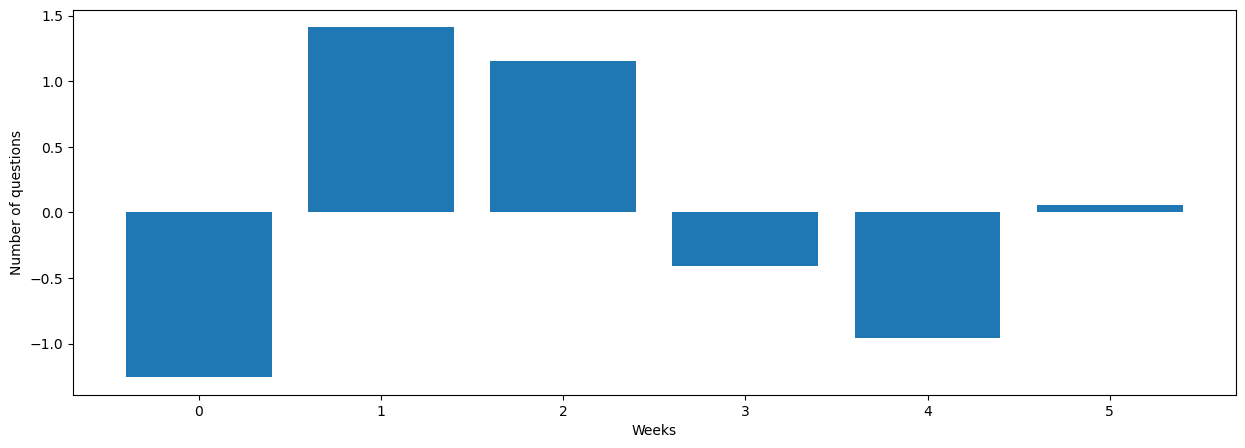

In [5]:
user_ids_german, data_german = cluster.prepare_data(students=mastery_df_german,min_week=6, scale = True)
cluster.visualize_data(data_german[len(data_german)-1]) # We visualize one student's data

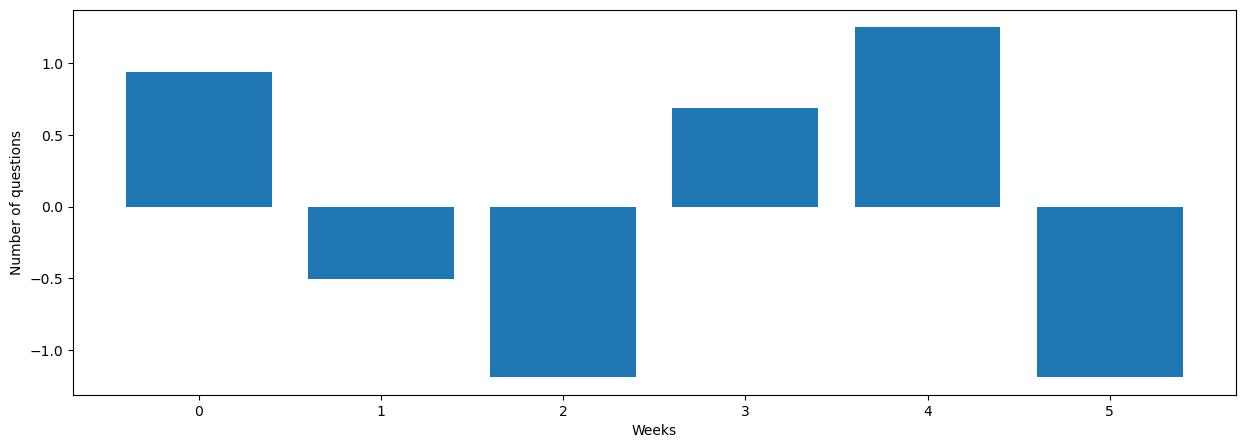

In [6]:
user_ids_math, data_math = cluster.prepare_data(students=mastery_df_math,min_week=6, scale = True)
cluster.visualize_data(data_math[len(data_math)-1]) # We visualize one student's data

In [7]:
print(data_german.shape)
print("__________________________")
data_german

(1024, 6)
__________________________


array([[-0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,  2.23606798,
        -0.4472136 ],
       [-0.48087792, -0.8014632 , -0.41676087,  0.48087792,  2.01968728,
        -0.8014632 ],
       [ 2.23606798, -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.4472136 ],
       ...,
       [-0.71316586,  2.0750826 ,  0.30827169, -0.24385671, -0.79598512,
        -0.6303466 ],
       [-0.82230257,  1.883932  ,  0.17182442, -1.31936606,  0.02454635,
         0.06136586],
       [-1.2560152 ,  1.41125304,  1.15722749, -0.40926338, -0.95965206,
         0.05645012]])

In [8]:
len(user_ids_german)

1024

## WARNING START
##      BELOW CELLS TAKE A REALLY LONG TIME TO RUN!!!!
### (They create the images under the ./images folder)
## For german

In [ ]:
from tslearn.metrics import cdist_dtw
windows = [1,2]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 0.5).tolist() + np.arange(10, 30, 1).tolist() + np.arange(30, 100, 10).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data_german, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'images_german/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

In [ ]:
windows = [3,4]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 1).tolist() + np.arange(10, 30, 10).tolist() + np.arange(30, 100, 30).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data_german, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'images_german/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

In [ ]:
windows = [5,6]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 1).tolist() + np.arange(10, 30, 10).tolist() + np.arange(30, 100, 30).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data_german, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'images_german/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

In [ ]:
D = cluster.get_distance_matrix(data_german, metric='e')
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 0.5).tolist() + np.arange(10, 30, 1).tolist() + np.arange(30, 100, 10).tolist()
n_cluster_list = range(2, 30)
for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
    if gamma == 0: continue
    #print("\tgamma: ", gamma)
    S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
    W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
    df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'images_german/scaled/window={0}', filename=f'gamma_{gamma}.png')
    plt.close('all')

## For math

In [ ]:
from tslearn.metrics import cdist_dtw
windows = [1,2]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 0.5).tolist() + np.arange(10, 30, 1).tolist() + np.arange(30, 100, 10).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data_math, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'images_math/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

In [ ]:
windows = [3,4]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 1).tolist() + np.arange(10, 30, 10).tolist() + np.arange(30, 100, 30).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data_math, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'images_math/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

In [ ]:
windows = [5,6]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 1).tolist() + np.arange(10, 30, 10).tolist() + np.arange(30, 100, 30).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data_math, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'images_math/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

In [ ]:
D = cluster.get_distance_matrix(data_math, metric='e')
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 0.5).tolist() + np.arange(10, 30, 1).tolist() + np.arange(30, 100, 10).tolist()
n_cluster_list = range(2, 30)
for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
    if gamma == 0: continue
    #print("\tgamma: ", gamma)
    S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
    W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
    df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'images_math/scaled/window={0}', filename=f'gamma_{gamma}.png')
    plt.close('all')

## WARNING END

In [7]:
import pandas as pd
def get_original_rows(user_ids, labels, original_df, min_weeks=6):
    """
    This function is used to get the non-scaled version of the data, in the case that cluster.prepare_data() function
    was used with scaled=True
    """
    temp = original_df.merge(pd.DataFrame({'user_id': user_ids, 'cluster': labels}), on='user_id', how='inner')
    temp = temp[temp['weeks_since_first_transaction'] < min_weeks]
    temp = (temp.sort_values(['user_id', 'weeks_since_first_transaction'], ascending=True)
                .groupby('user_id')
                .agg({'num_questions': lambda x: list(x)}))
    temp = temp[temp['num_questions'].apply(lambda x: sum(x)) > 0]
    temp.reset_index(inplace=True)
    temp = np.asarray(temp.num_questions.values.tolist())
    return temp

In [10]:
windows = [0,1,2,3,4,5,6]
#For german
D_for_window_german = {
    window: cluster.get_distance_matrix(data_german, metric='dtw', window=window) if window != 0 else cluster.get_distance_matrix(data_german, metric='e') for window in windows
}
#For math
D_for_window_math = {
    window: cluster.get_distance_matrix(data_math, metric='dtw', window=window) if window != 0 else cluster.get_distance_matrix(data_math, metric='e') for window in windows
}

Number of clusters: 4, Label Length: 1024
Group 0 has 165 students
Group 1 has 194 students
Group 2 has 176 students
Group 3 has 489 students


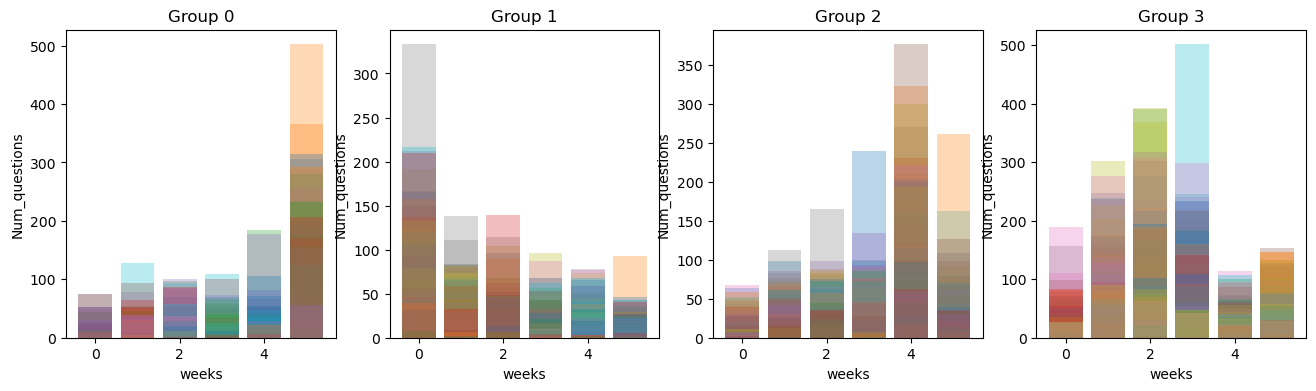

In [12]:
#GERMAN
gamma = 5
k = 4
window = 0
S = cluster.get_affinity_matrix(D_for_window_german[window], gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
cluster.visualize_clusters(get_original_rows(user_ids_german, kmeans.labels_, mastery_df_german, 6), kmeans.labels_, 6)

Number of clusters: 4, Label Length: 733
Group 0 has 100 students
Group 1 has 257 students
Group 2 has 88 students
Group 3 has 288 students


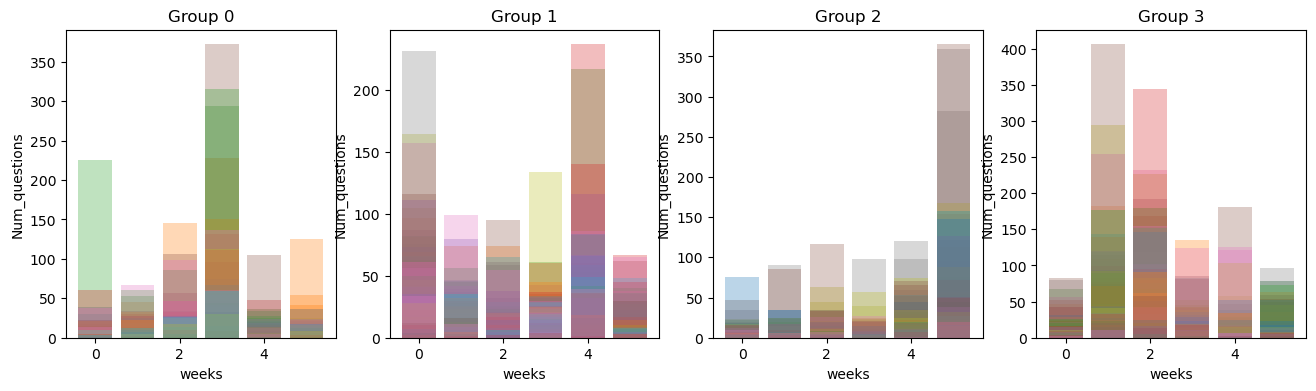

In [13]:
#MATH
gamma = 5
k = 4
window = 0
S = cluster.get_affinity_matrix(D_for_window_math[window], gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
cluster.visualize_clusters(get_original_rows(user_ids_math, kmeans.labels_, mastery_df_math, 6), kmeans.labels_, 6)

window:  1
Number of clusters: 3, Label Length: 1024
Group 0 has 167 students
Group 1 has 667 students
Group 2 has 190 students


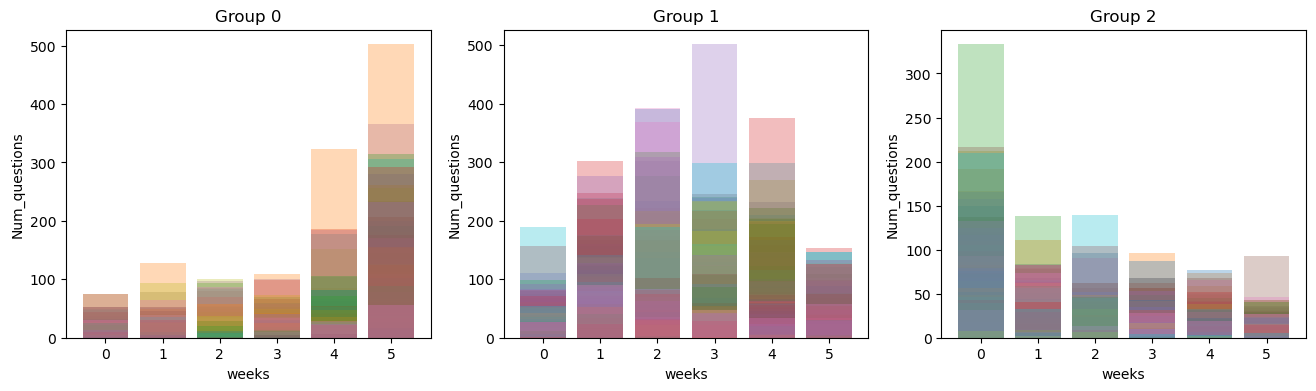

_________________________________________________________
window:  2
Number of clusters: 3, Label Length: 1024
Group 0 has 668 students
Group 1 has 166 students
Group 2 has 190 students


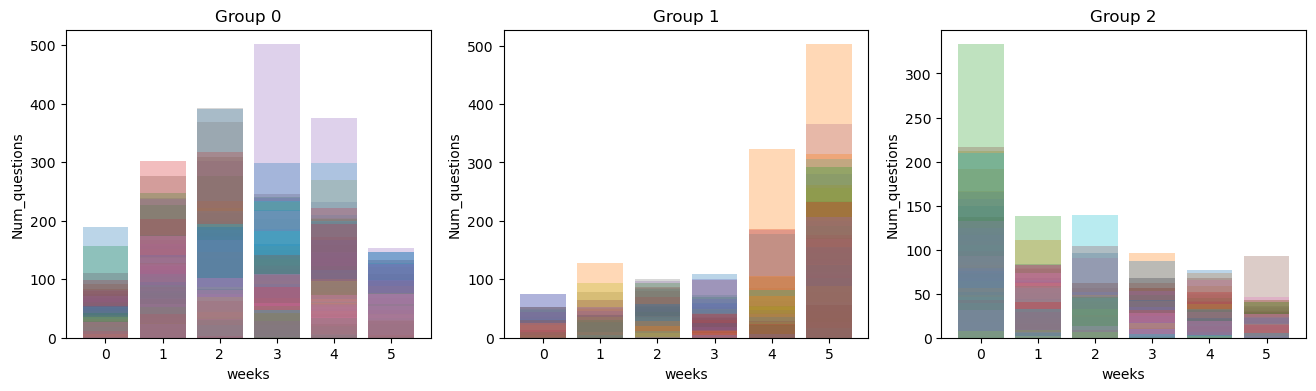

_________________________________________________________
window:  3
Number of clusters: 3, Label Length: 1024
Group 0 has 669 students
Group 1 has 165 students
Group 2 has 190 students


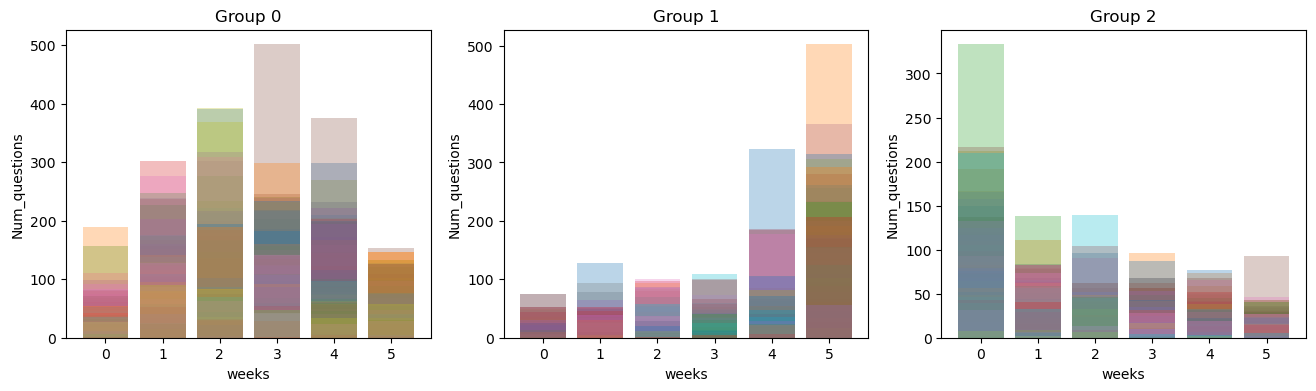

_________________________________________________________
window:  4
Number of clusters: 3, Label Length: 1024
Group 0 has 669 students
Group 1 has 165 students
Group 2 has 190 students


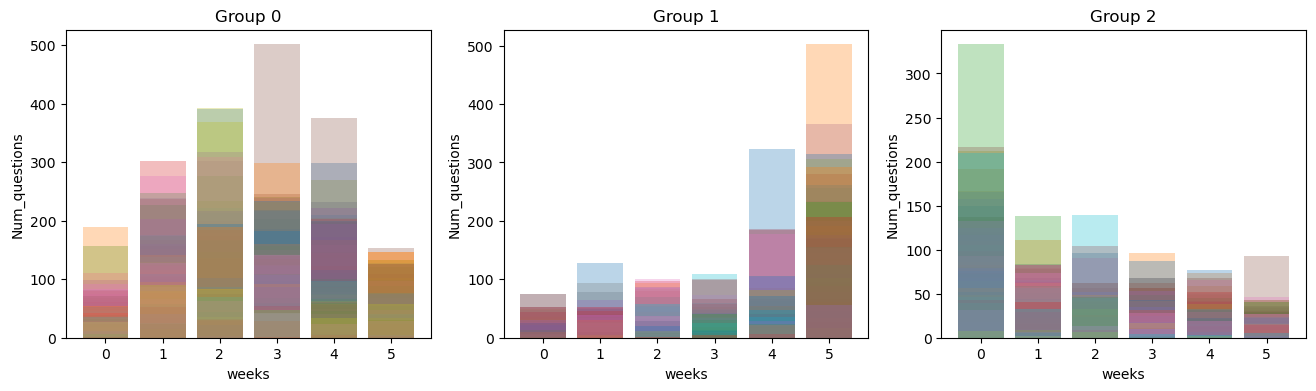

_________________________________________________________
window:  5
Number of clusters: 3, Label Length: 1024
Group 0 has 669 students
Group 1 has 165 students
Group 2 has 190 students


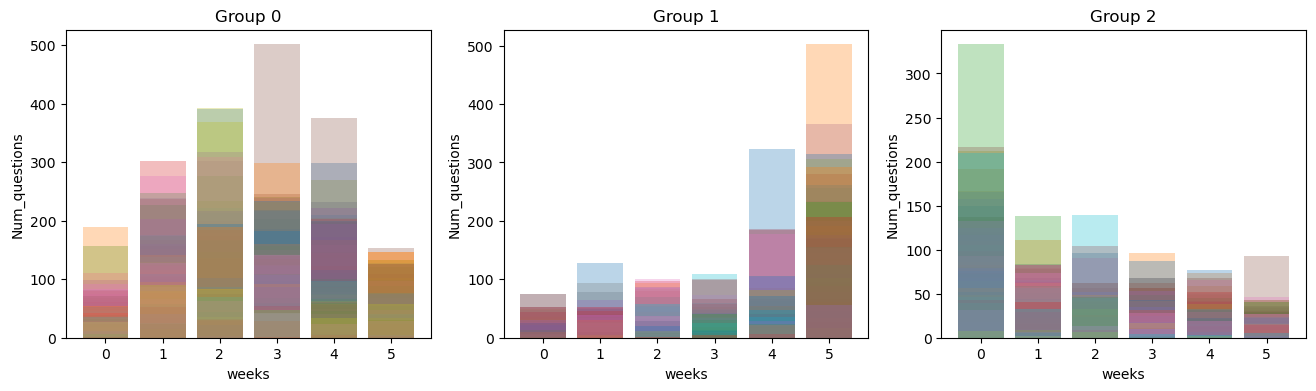

_________________________________________________________
window:  6
Number of clusters: 3, Label Length: 1024
Group 0 has 669 students
Group 1 has 165 students
Group 2 has 190 students


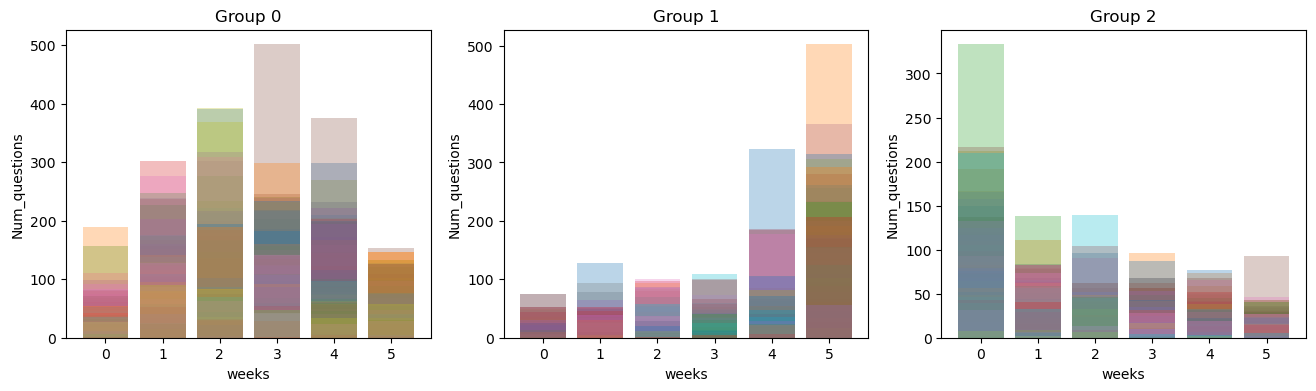

_________________________________________________________


In [15]:
#GERMAN
gamma = 5
k = 3
for window in windows:
    if window == 0: continue
    print("window: ", window)
    D = D_for_window_german[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids_german, kmeans.labels_, mastery_df_german, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

window:  1
Number of clusters: 3, Label Length: 733
Group 0 has 467 students
Group 1 has 82 students
Group 2 has 184 students


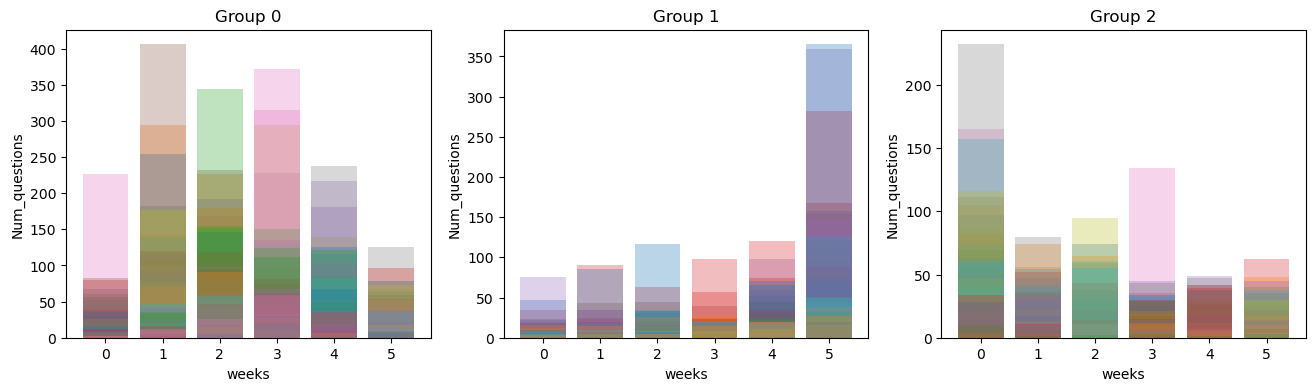

_________________________________________________________
window:  2
Number of clusters: 3, Label Length: 733
Group 0 has 467 students
Group 1 has 83 students
Group 2 has 183 students


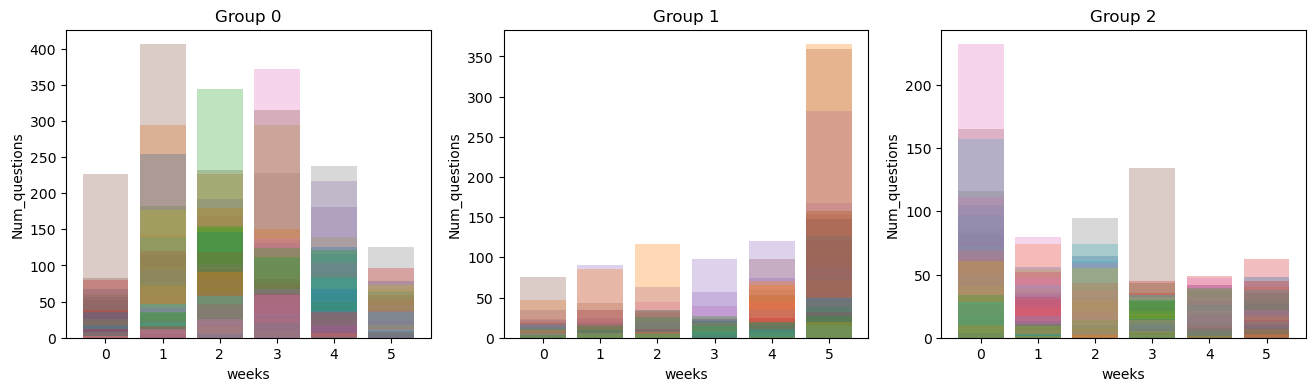

_________________________________________________________
window:  3
Number of clusters: 3, Label Length: 733
Group 0 has 467 students
Group 1 has 83 students
Group 2 has 183 students


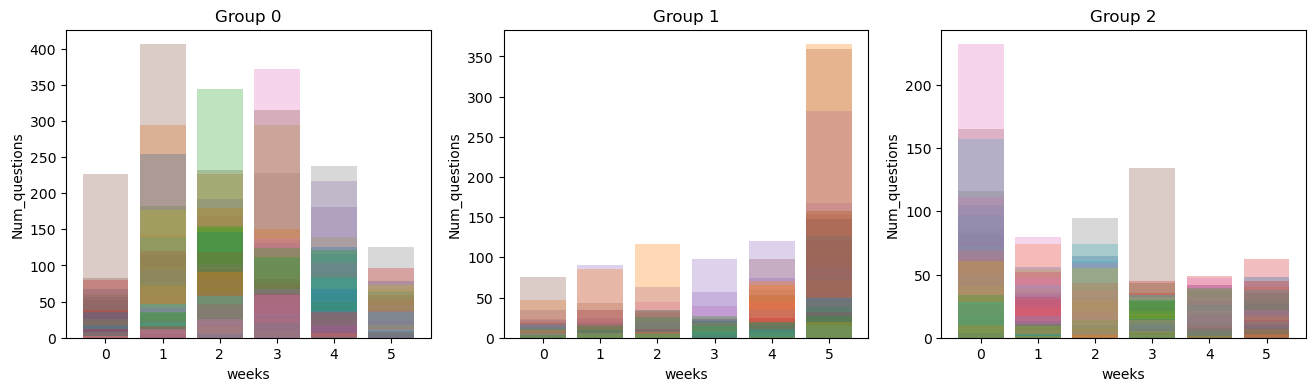

_________________________________________________________
window:  4
Number of clusters: 3, Label Length: 733
Group 0 has 467 students
Group 1 has 83 students
Group 2 has 183 students


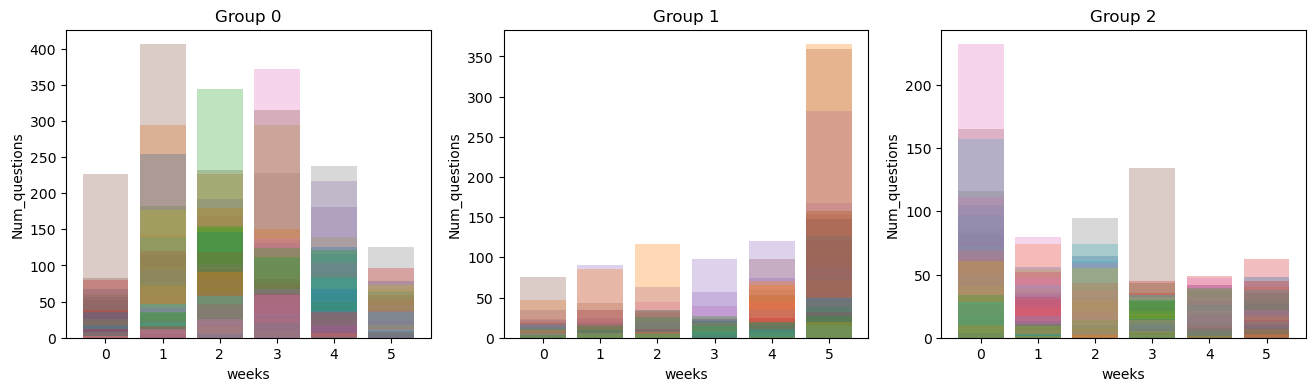

_________________________________________________________
window:  5
Number of clusters: 3, Label Length: 733
Group 0 has 467 students
Group 1 has 83 students
Group 2 has 183 students


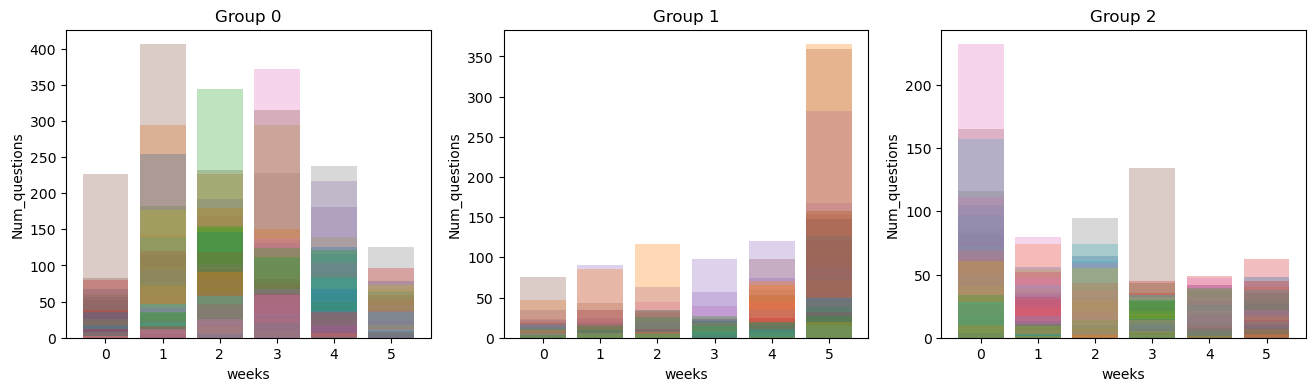

_________________________________________________________
window:  6
Number of clusters: 3, Label Length: 733
Group 0 has 467 students
Group 1 has 83 students
Group 2 has 183 students


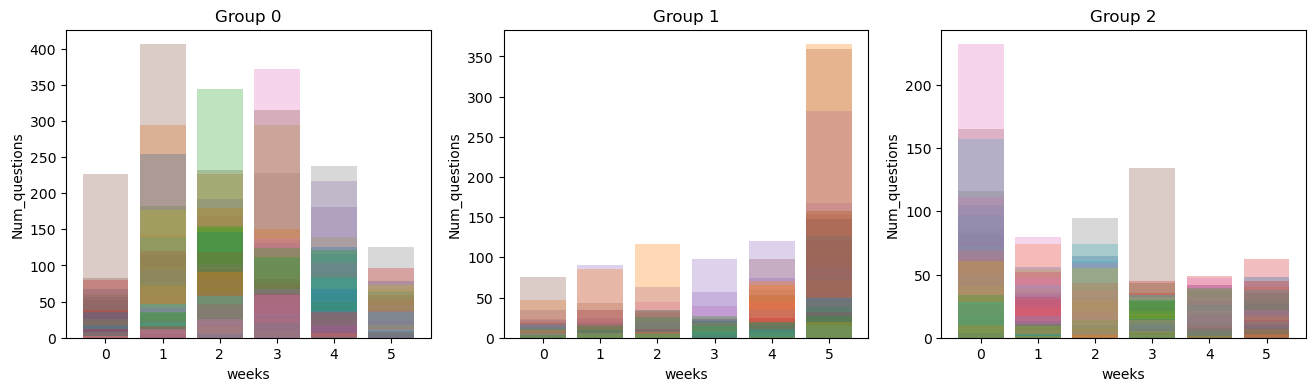

_________________________________________________________


In [17]:
#MATH
gamma = 5
k = 3
for window in windows:
    if window == 0: continue
    print("window: ", window)
    D = D_for_window_math[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids_math, kmeans.labels_, mastery_df_math, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

window:  0
Number of clusters: 3, Label Length: 1024
Group 0 has 542 students
Group 1 has 289 students
Group 2 has 193 students


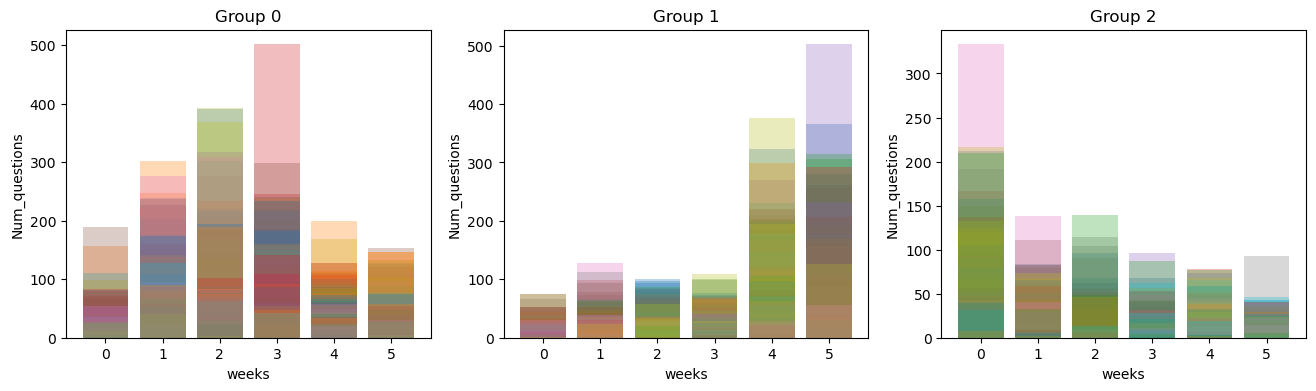

_________________________________________________________
window:  1
Number of clusters: 3, Label Length: 1024
Group 0 has 655 students
Group 1 has 171 students
Group 2 has 198 students


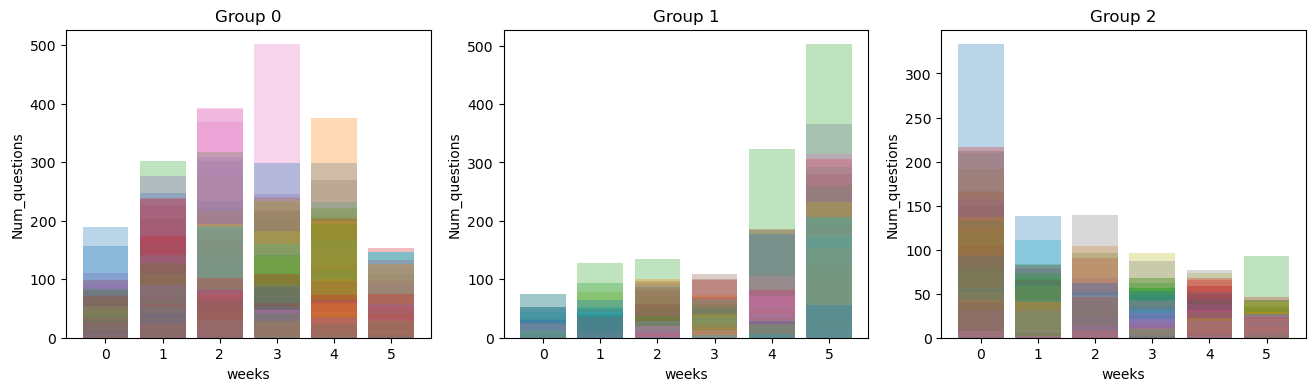

_________________________________________________________
window:  2
Number of clusters: 3, Label Length: 1024
Group 0 has 654 students
Group 1 has 174 students
Group 2 has 196 students


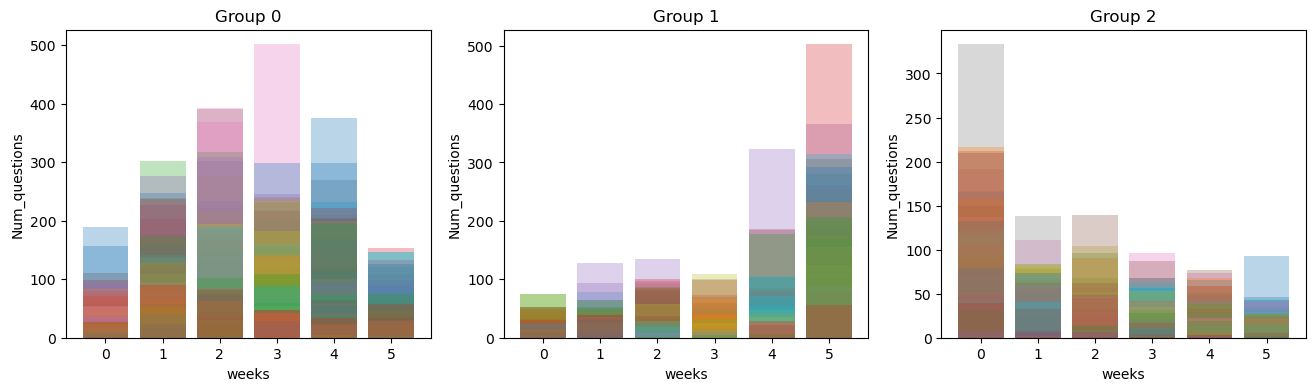

_________________________________________________________
window:  3
Number of clusters: 3, Label Length: 1024
Group 0 has 174 students
Group 1 has 196 students
Group 2 has 654 students


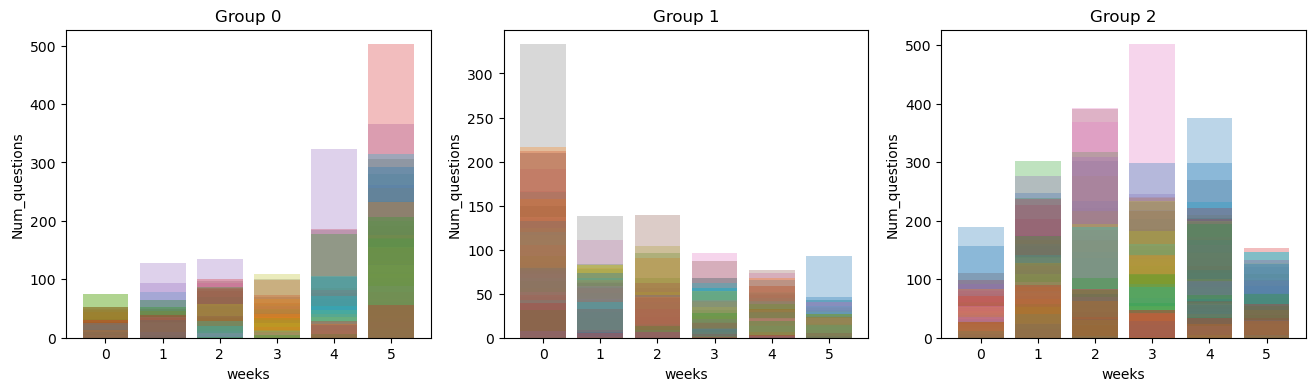

_________________________________________________________
window:  4
Number of clusters: 3, Label Length: 1024
Group 0 has 174 students
Group 1 has 196 students
Group 2 has 654 students


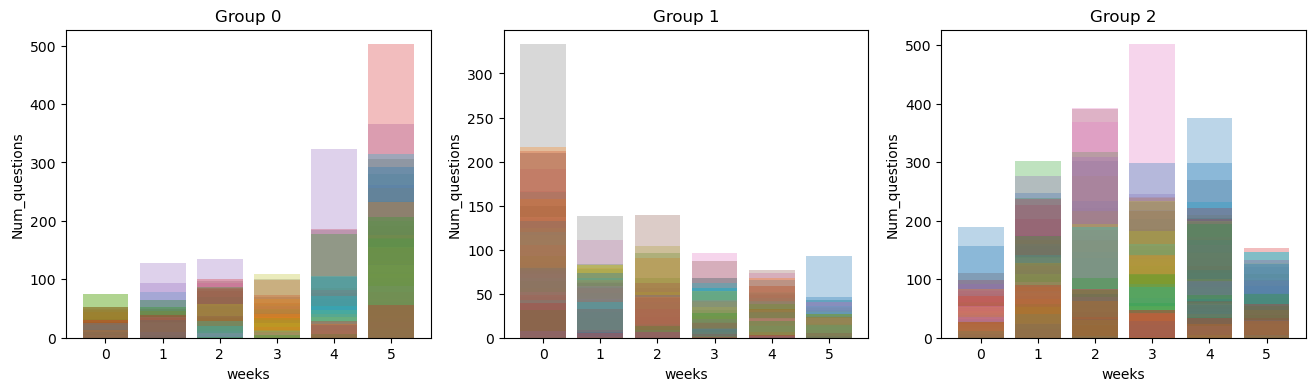

_________________________________________________________
window:  5
Number of clusters: 3, Label Length: 1024
Group 0 has 174 students
Group 1 has 196 students
Group 2 has 654 students


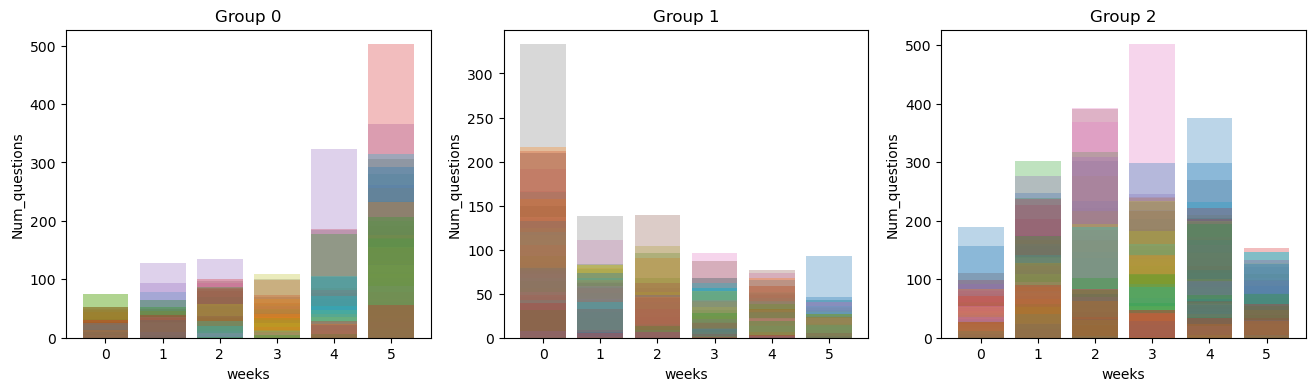

_________________________________________________________
window:  6
Number of clusters: 3, Label Length: 1024
Group 0 has 174 students
Group 1 has 196 students
Group 2 has 654 students


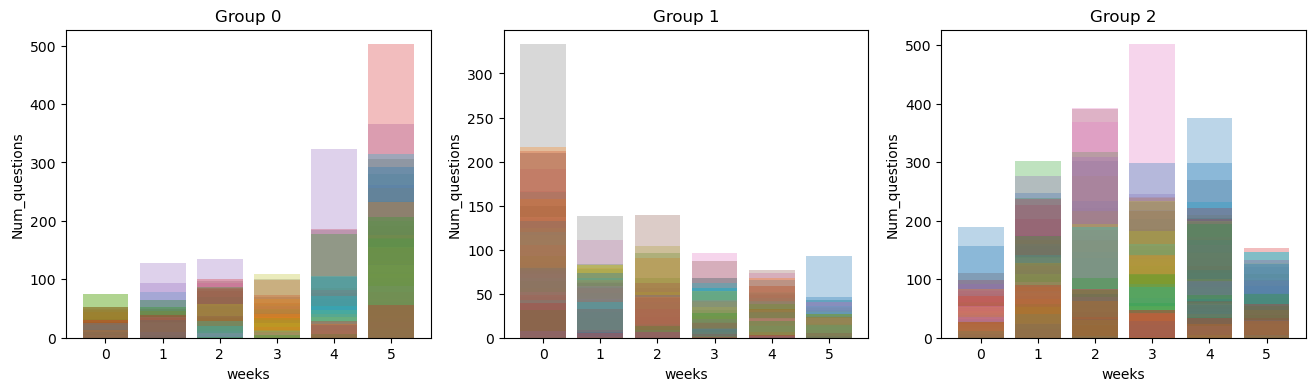

_________________________________________________________


In [18]:
#GERMAN
gamma = 10
k = 3
for window in windows:
    print("window: ", window)
    D = D_for_window_german[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids_german, kmeans.labels_, mastery_df_german, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

window:  0
Number of clusters: 3, Label Length: 733
Group 0 has 350 students
Group 1 has 298 students
Group 2 has 85 students


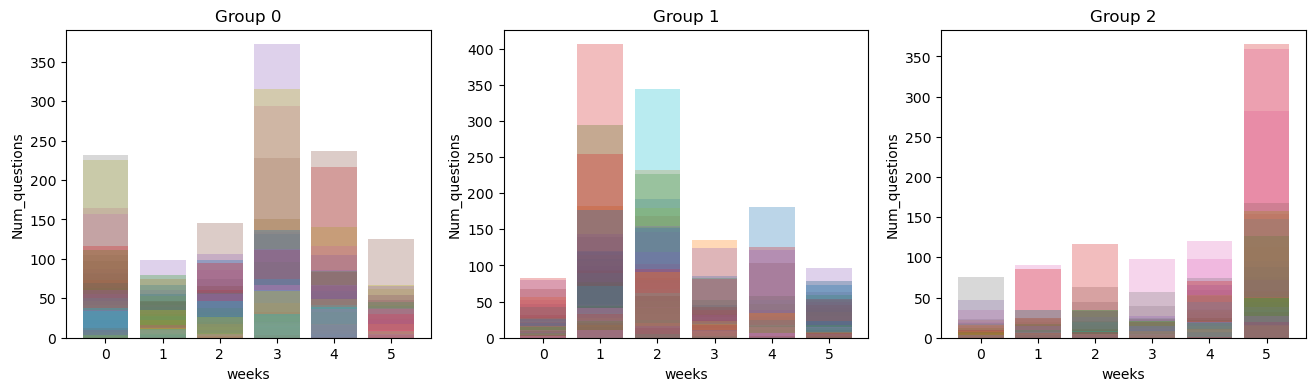

_________________________________________________________
window:  1
Number of clusters: 3, Label Length: 733
Group 0 has 471 students
Group 1 has 186 students
Group 2 has 76 students


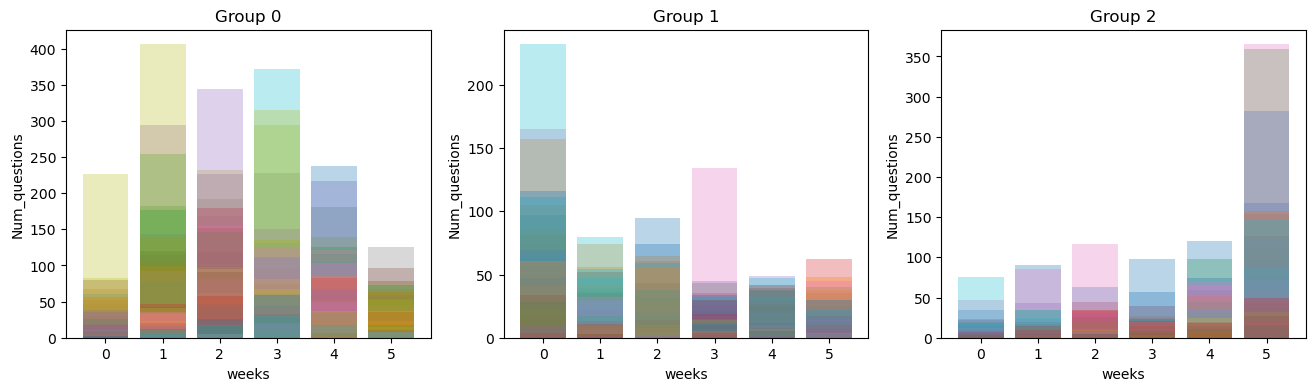

_________________________________________________________
window:  2
Number of clusters: 3, Label Length: 733
Group 0 has 472 students
Group 1 has 185 students
Group 2 has 76 students


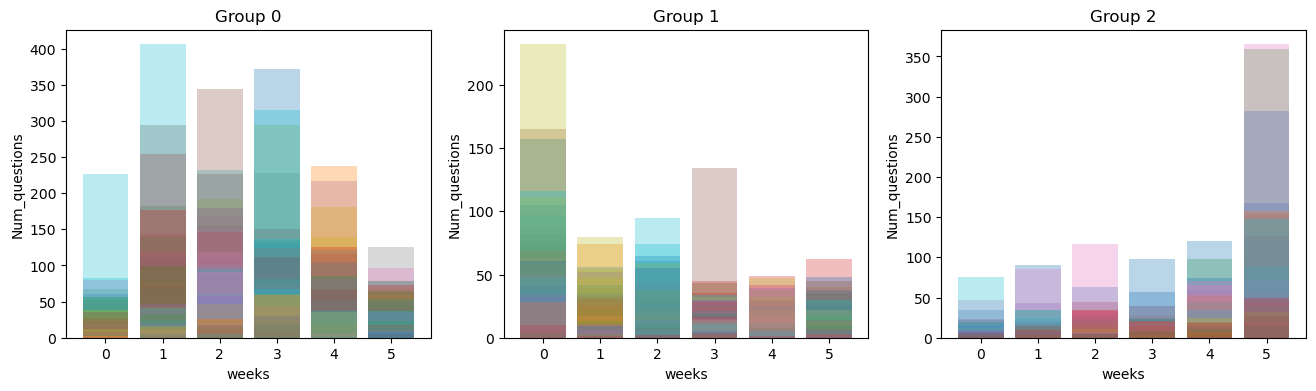

_________________________________________________________
window:  3
Number of clusters: 3, Label Length: 733
Group 0 has 472 students
Group 1 has 185 students
Group 2 has 76 students


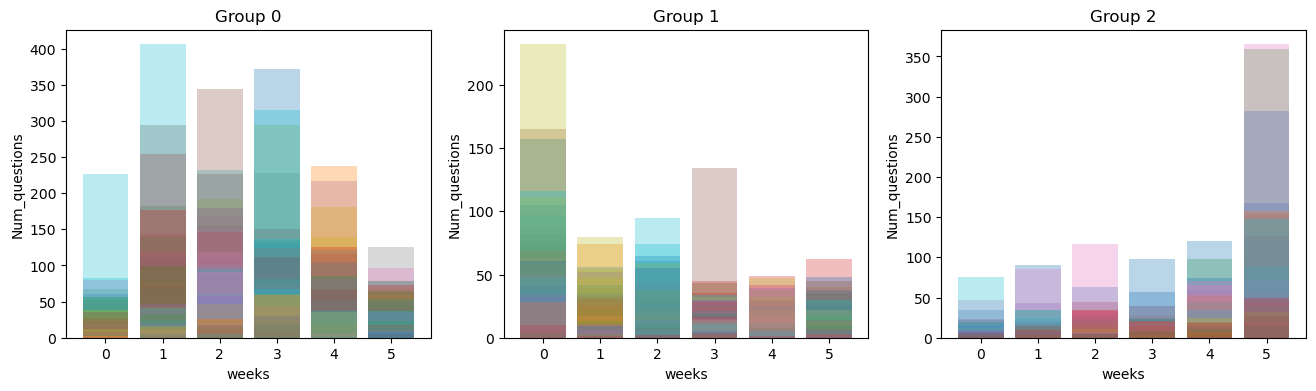

_________________________________________________________
window:  4
Number of clusters: 3, Label Length: 733
Group 0 has 472 students
Group 1 has 185 students
Group 2 has 76 students


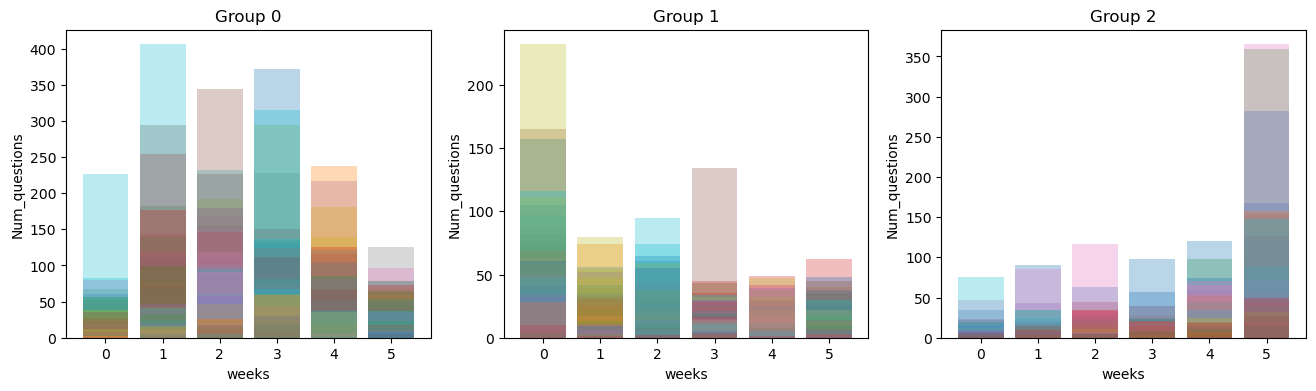

_________________________________________________________
window:  5
Number of clusters: 3, Label Length: 733
Group 0 has 472 students
Group 1 has 185 students
Group 2 has 76 students


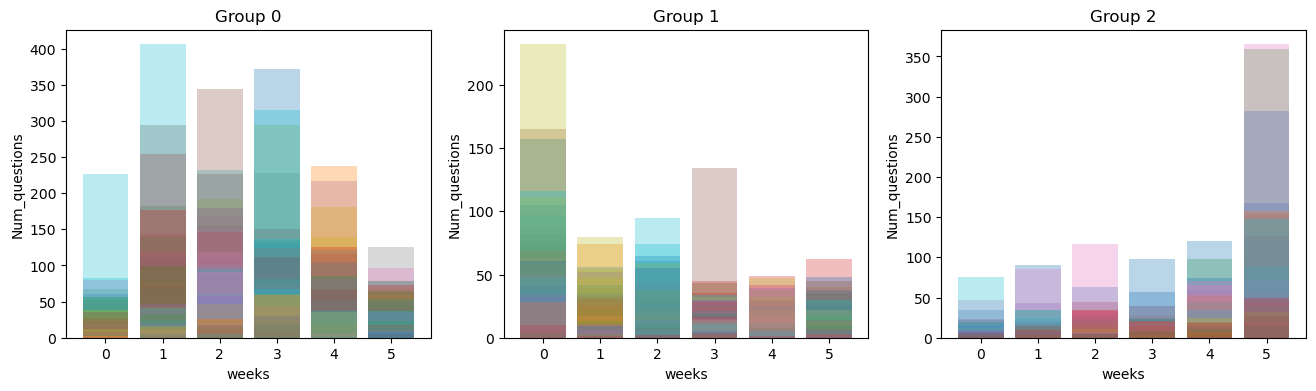

_________________________________________________________
window:  6
Number of clusters: 3, Label Length: 733
Group 0 has 472 students
Group 1 has 185 students
Group 2 has 76 students


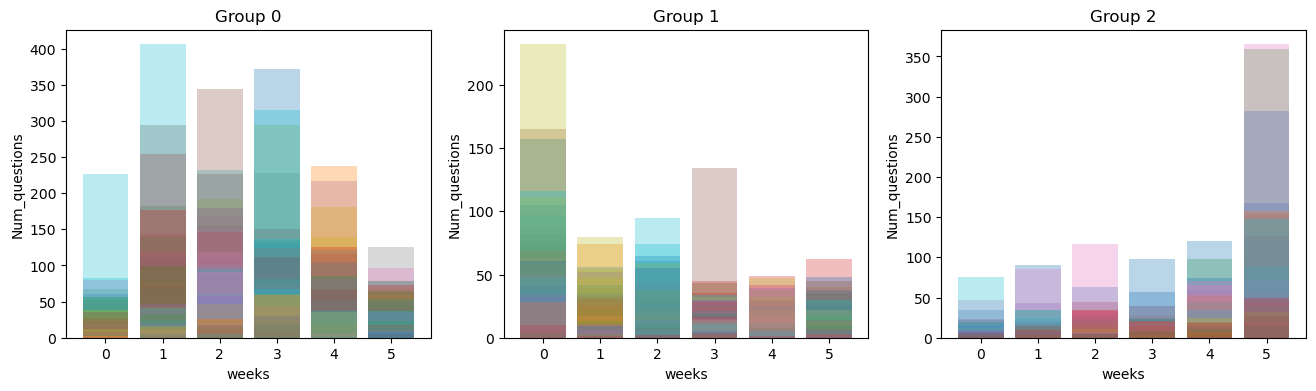

_________________________________________________________


In [19]:
#MATH
gamma = 10
k = 3
for window in windows:
    print("window: ", window)
    D = D_for_window_math[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids_math, kmeans.labels_, mastery_df_math, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

window:  0
Number of clusters: 3, Label Length: 1024
Group 0 has 304 students
Group 1 has 527 students
Group 2 has 193 students


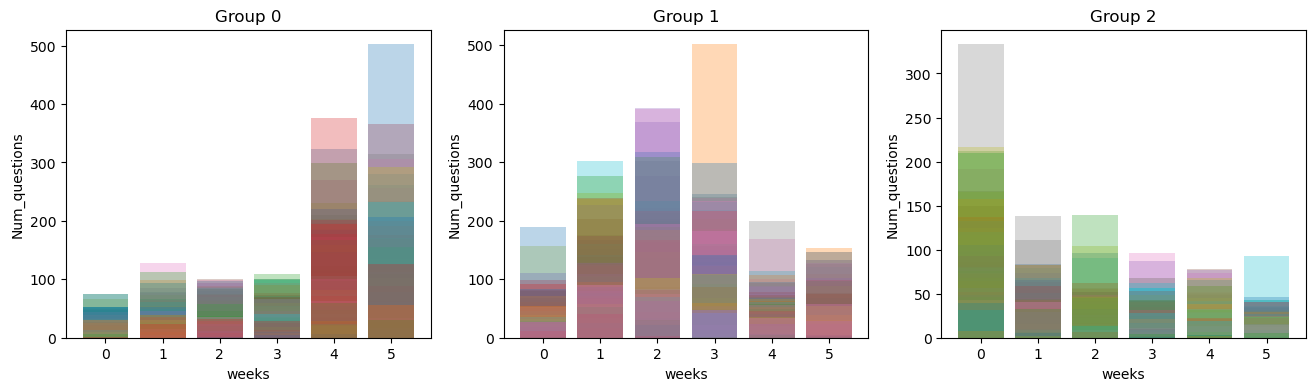

_________________________________________________________
window:  1
Number of clusters: 3, Label Length: 1024
Group 0 has 188 students
Group 1 has 204 students
Group 2 has 632 students


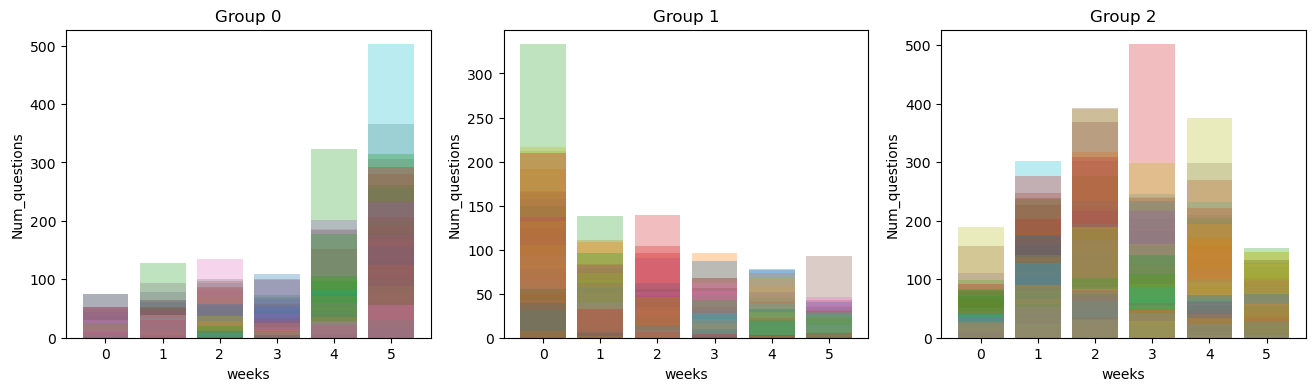

_________________________________________________________
window:  2
Number of clusters: 3, Label Length: 1024
Group 0 has 185 students
Group 1 has 641 students
Group 2 has 198 students


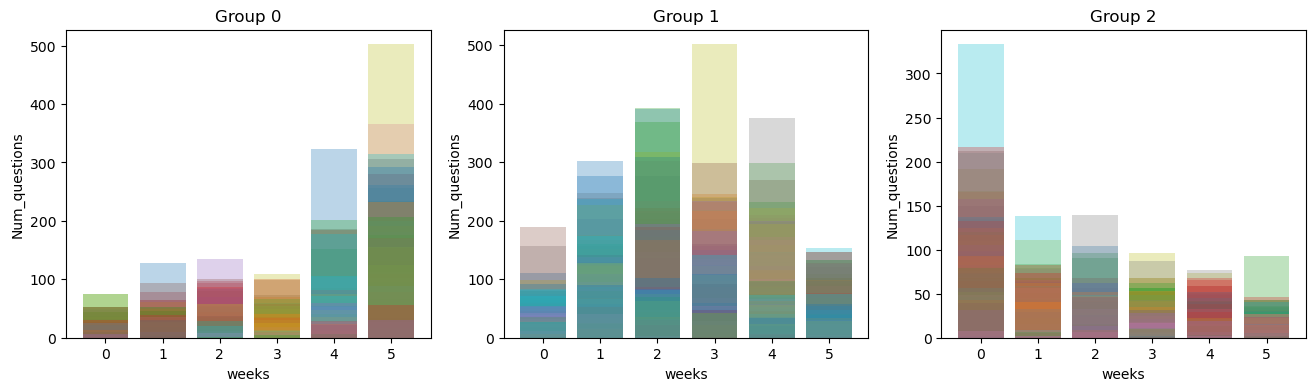

_________________________________________________________
window:  3
Number of clusters: 3, Label Length: 1024
Group 0 has 185 students
Group 1 has 641 students
Group 2 has 198 students


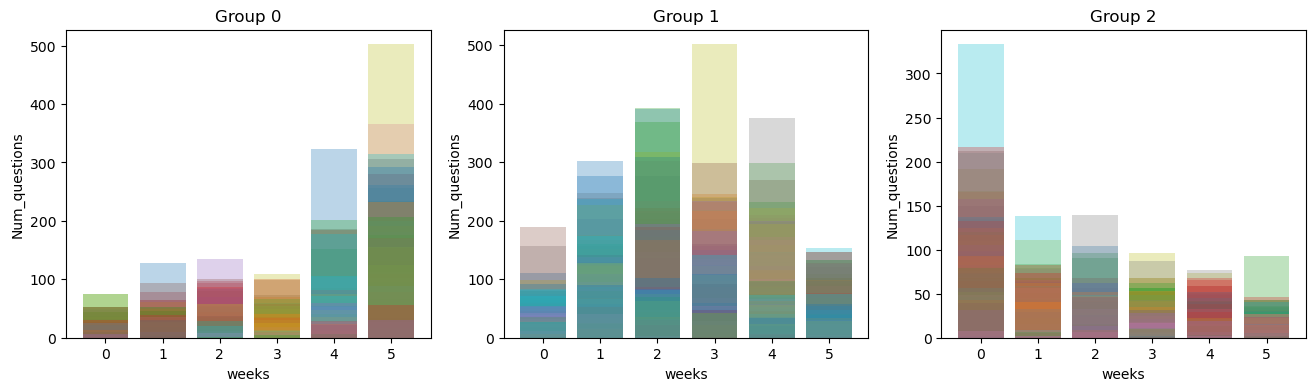

_________________________________________________________
window:  4
Number of clusters: 3, Label Length: 1024
Group 0 has 185 students
Group 1 has 641 students
Group 2 has 198 students


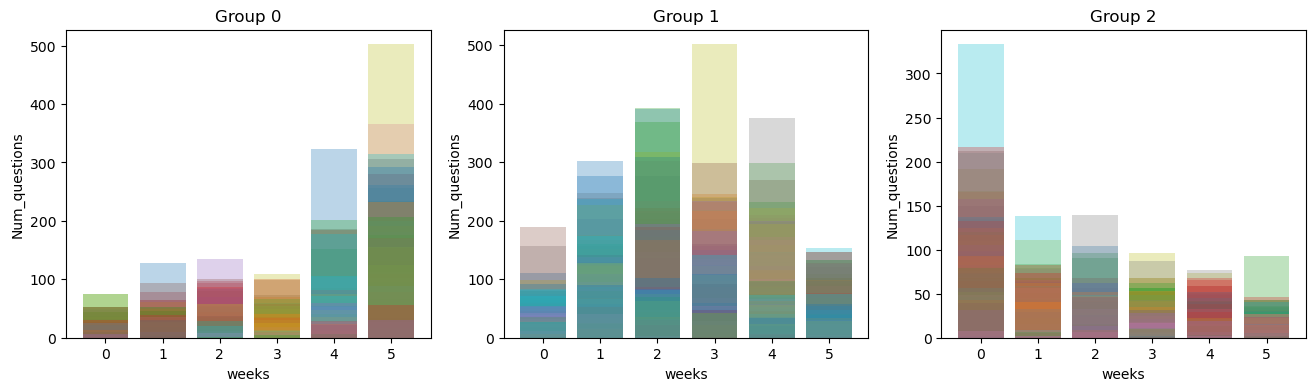

_________________________________________________________
window:  5
Number of clusters: 3, Label Length: 1024
Group 0 has 185 students
Group 1 has 641 students
Group 2 has 198 students


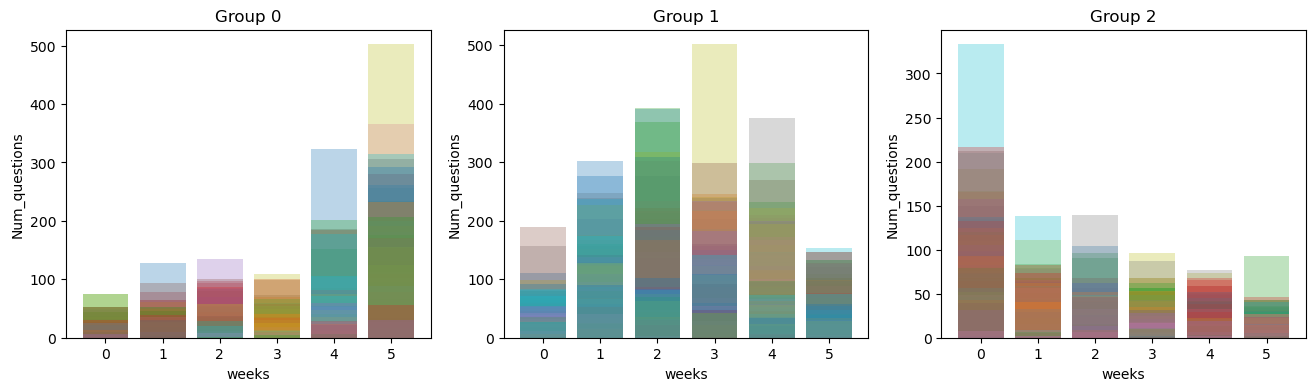

_________________________________________________________
window:  6
Number of clusters: 3, Label Length: 1024
Group 0 has 185 students
Group 1 has 641 students
Group 2 has 198 students


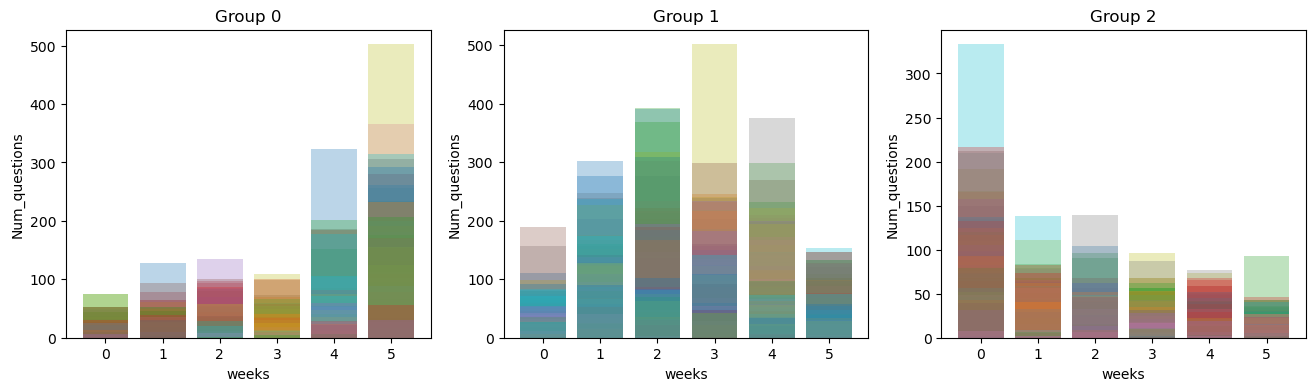

_________________________________________________________


In [24]:
#GERMAN
gamma = 1
k = 3
for window in windows:
    print("window: ", window)
    D = D_for_window_german[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S, connectivity='epsilon')
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids_german, kmeans.labels_, mastery_df_german, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

window:  0
Number of clusters: 3, Label Length: 733
Group 0 has 337 students
Group 1 has 293 students
Group 2 has 103 students


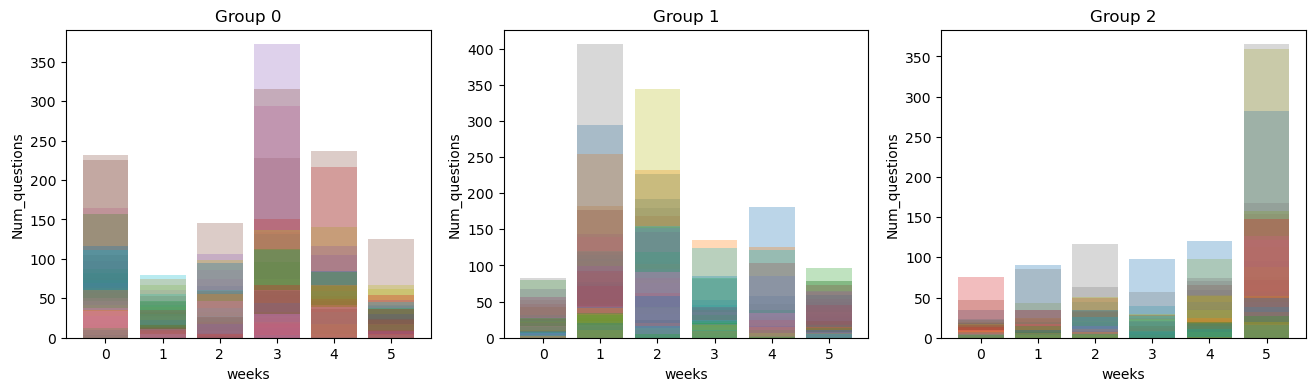

_________________________________________________________
window:  1
Number of clusters: 3, Label Length: 733
Group 0 has 444 students
Group 1 has 95 students
Group 2 has 194 students


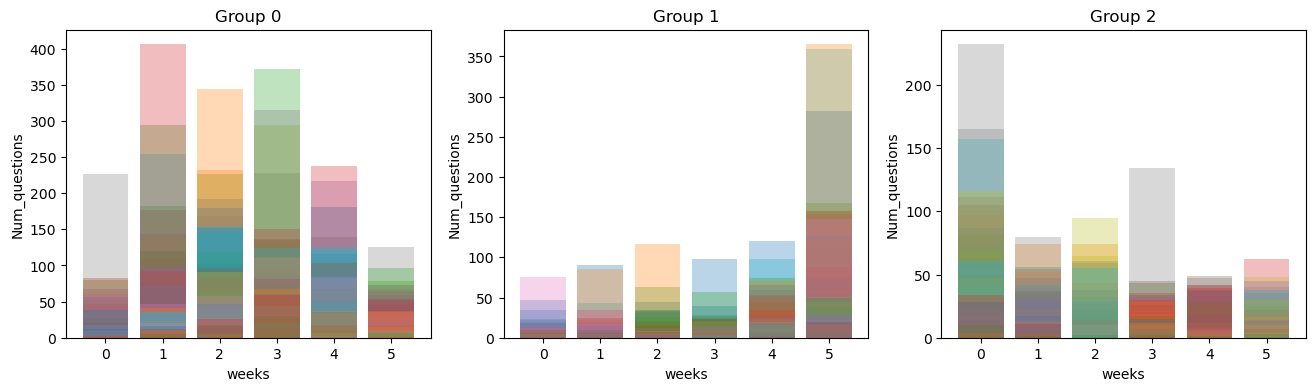

_________________________________________________________
window:  2
Number of clusters: 3, Label Length: 733
Group 0 has 446 students
Group 1 has 95 students
Group 2 has 192 students


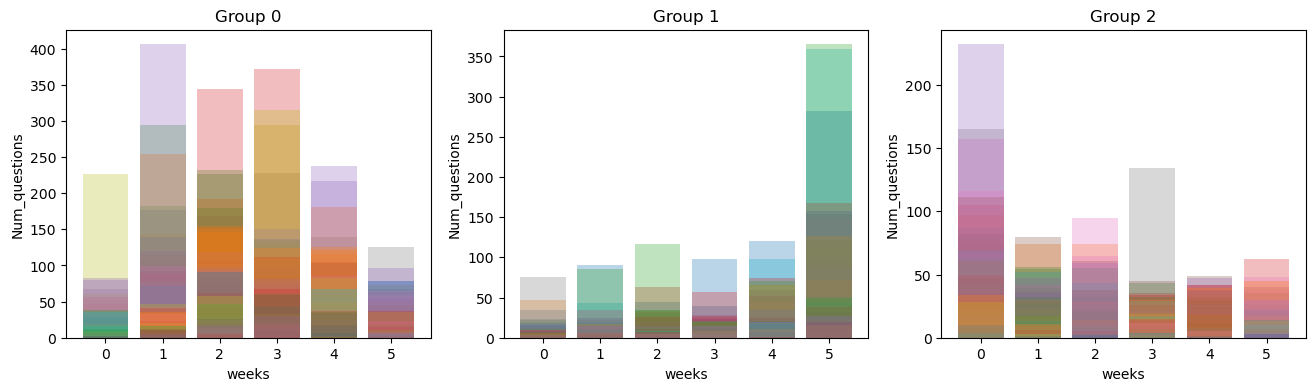

_________________________________________________________
window:  3
Number of clusters: 3, Label Length: 733
Group 0 has 448 students
Group 1 has 95 students
Group 2 has 190 students


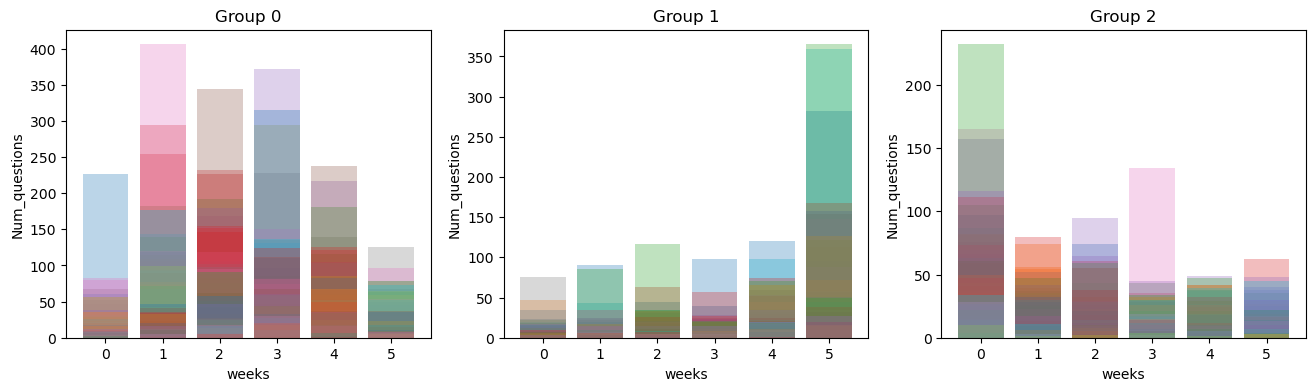

_________________________________________________________
window:  4
Number of clusters: 3, Label Length: 733
Group 0 has 448 students
Group 1 has 95 students
Group 2 has 190 students


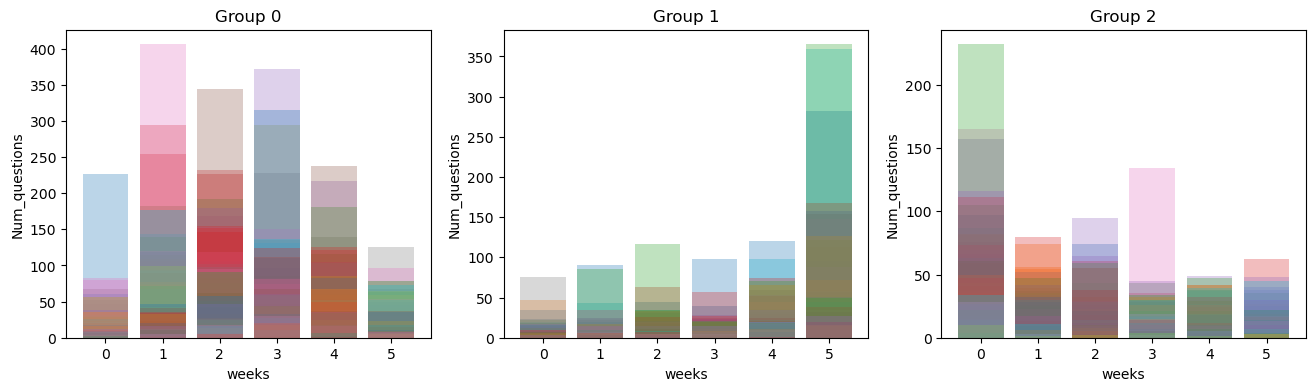

_________________________________________________________
window:  5
Number of clusters: 3, Label Length: 733
Group 0 has 448 students
Group 1 has 95 students
Group 2 has 190 students


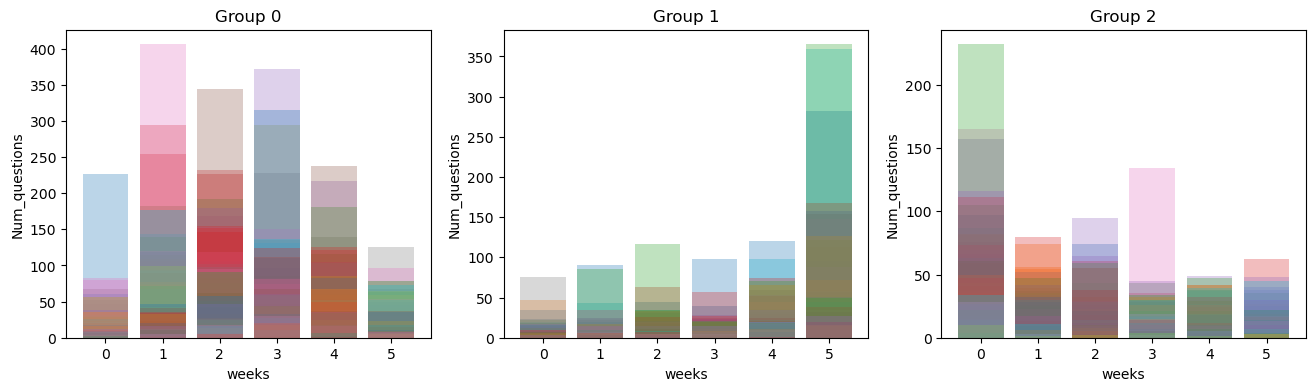

_________________________________________________________
window:  6
Number of clusters: 3, Label Length: 733
Group 0 has 448 students
Group 1 has 95 students
Group 2 has 190 students


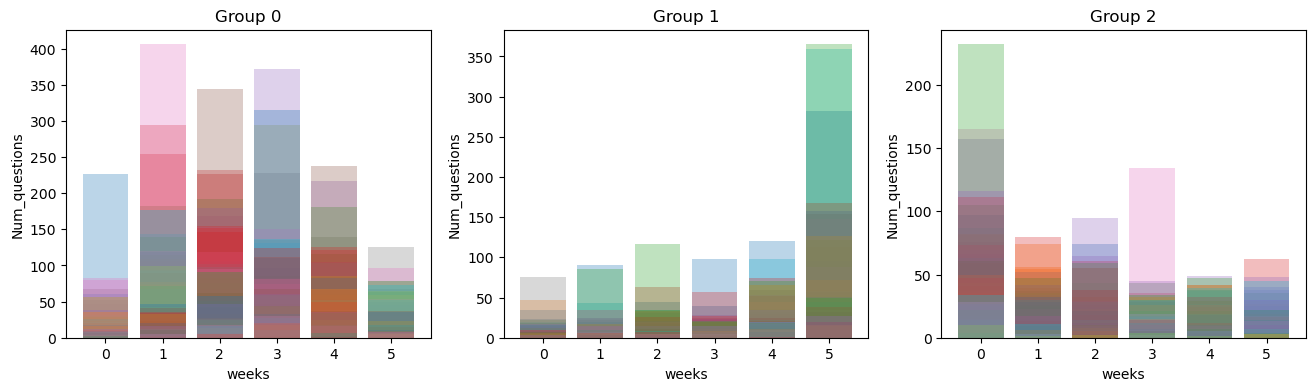

_________________________________________________________


In [23]:
#MATH
gamma = 1
k = 3
for window in windows:
    print("window: ", window)
    D = D_for_window_math[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S, connectivity='epsilon')
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids_math, kmeans.labels_, mastery_df_math, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

Now we will add the labels to the data set

First we need to reconstruct the data set that we used for clustering

In [28]:
# from mastery_df_german, drop users that have their max_weeks_since_first_transaction < 6
min_6_weeks_german = mastery_df_german.groupby('user_id').filter(lambda x: len(x) >= 7)
min_6_weeks_german = min_6_weeks_german[min_6_weeks_german['weeks_since_first_transaction'] <= 6] # only consider their first 6 weeks...
min_6_weeks_german = min_6_weeks_german.groupby('user_id').filter(lambda x: sum(x.num_questions) > 0) # ... but only if they have answered at least one question
min_6_weeks_german.user_id.nunique()

1025

In [29]:
# from mastery_df_math, drop users that have their max_weeks_since_first_transaction < 6
min_6_weeks_math = mastery_df_math.groupby('user_id').filter(lambda x: len(x) >= 7)
min_6_weeks_math = min_6_weeks_math[min_6_weeks_math['weeks_since_first_transaction'] <= 6] # only consider their first 6 weeks...
min_6_weeks_math = min_6_weeks_math.groupby('user_id').filter(lambda x: sum(x.num_questions) > 0) # ... but only if they have answered at least one question
min_6_weeks_math.user_id.nunique()

737

Now we have the data set, we cluster with some parameters

In [30]:
gamma = 5
k = 3
window = 1
D = D_for_window_german[window]
S = cluster.get_affinity_matrix(D, gamma)
W = cluster.get_adjacency(S)
kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)

# merge the labels to min_6_weeks
min_6_weeks_german_merged = min_6_weeks_german.merge(pd.DataFrame({'user_id': user_ids_german, 'cluster': kmeans.labels_}), on='user_id', how='inner')
print(min_6_weeks_german_merged.user_id.nunique())
min_6_weeks_german_merged.head()

1024


,user_id,title,weeks_since_first_transaction,mastery,diligence,num_questions,percentage_correct,num_review,num_view,ratio_window_visible,cluster
0,387604,Deutsch,0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1
1,387604,Deutsch,1,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1
2,387604,Deutsch,2,0.0,0.0,0.0,NaN,0.0,1.0,0.909091,1
3,387604,Deutsch,3,0.0,0.0,0.0,NaN,0.0,NaN,0.900000,1
4,387604,Deutsch,4,0.0,0.0,1.0,0.0,0.0,15.0,0.645161,1


The following cell constructs all possible combinations of clustering parameters to experiment on.

In [36]:
import os
gamma_values = [0.1, 2, 5]
k_values = [2, 3, 4]
window_values = [0, 1, 3]
combinations = []

#Create combinations of gamma, k and window variables
for i in gamma_values:
    for j in k_values:
        for k in window_values:
            combinations.append([i,j,k])

The following cell clusters the students using different parameters and saves them as .csv files under /cluster_csv folder

## For German

In [38]:
#Create folder cluster_csv if it does not exists
exists = os.path.exists("cluster_csv")
if not exists:
    os.makedirs("cluster_csv")
    
for c in combinations:
    gamma = c[0]
    k = c[1]
    window = c[2]
    D = D_for_window_german[window]
    S = cluster.get_affinity_matrix(D, gamma)
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)

    # merge the labels to min_6_weeks for german
    min_6_weeks_german_merged = min_6_weeks_german.merge(pd.DataFrame({'user_id': user_ids_german, 'cluster': kmeans.labels_}), on='user_id', how='inner')
    path = f"cluster_csv/german_gamma_{gamma}_k_{k}_window_{window}.csv"
    min_6_weeks_german_merged.to_csv(path)
    

## For Math

In [39]:
import os
#Create foldeer cluster_csv if it does not exists
exists = os.path.exists("cluster_csv")
if not exists:
    os.makedirs("cluster_csv")
    
for c in combinations:
    gamma = c[0]
    k = c[1]
    window = c[2]
    D = D_for_window_math[window]
    S = cluster.get_affinity_matrix(D, gamma)
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)

    # merge the labels to min_6_weeks for math
    min_6_weeks_math_merged = min_6_weeks_math.merge(pd.DataFrame({'user_id': user_ids_math, 'cluster': kmeans.labels_}), on='user_id', how='inner')
    path = f"cluster_csv/math_gamma_{gamma}_k_{k}_window_{window}.csv"
    min_6_weeks_math_merged.to_csv(path)

## Model Building

### Regression

#### Deutsch

In [1]:
german_filenames = [
    'german_gamma_0.1_k_2_window_0.csv',
    'german_gamma_0.1_k_2_window_1.csv',
    'german_gamma_0.1_k_2_window_3.csv',
    'german_gamma_0.1_k_3_window_0.csv',
    'german_gamma_0.1_k_3_window_1.csv',
    'german_gamma_0.1_k_3_window_3.csv',
    'german_gamma_0.1_k_4_window_0.csv',
    'german_gamma_0.1_k_4_window_1.csv',
    'german_gamma_0.1_k_4_window_3.csv',
    'german_gamma_2_k_2_window_0.csv',
    'german_gamma_2_k_2_window_1.csv',
    'german_gamma_2_k_2_window_3.csv',
    'german_gamma_2_k_3_window_0.csv',
    'german_gamma_2_k_3_window_1.csv',
    'german_gamma_2_k_3_window_3.csv',
    'german_gamma_2_k_4_window_0.csv',
    'german_gamma_2_k_4_window_1.csv',
    'german_gamma_2_k_4_window_3.csv',
    'german_gamma_5_k_2_window_0.csv',
    'german_gamma_5_k_2_window_1.csv',
    'german_gamma_5_k_2_window_3.csv',
    'german_gamma_5_k_3_window_0.csv',
    'german_gamma_5_k_3_window_1.csv',
    'german_gamma_5_k_3_window_3.csv',
    'german_gamma_5_k_4_window_0.csv',
    'german_gamma_5_k_4_window_1.csv',
    'german_gamma_5_k_4_window_3.csv',
]

In [2]:
from utils import open_file

deutsch_data = open_file(file_name="german_gamma_5_k_4_window_3.csv", path="cluster_csv")
deutsch_data = deutsch_data.drop("Unnamed: 0", axis=1)
deutsch_data.head()

[FOUND] File : german_gamma_5_k_4_window_3.csv
	Opening german_gamma_5_k_4_window_3.csv dataset
	File loaded with : 7168 lines and 12 columns


,user_id,title,weeks_since_first_transaction,mastery,diligence,num_questions,percentage_correct,num_review,num_view,ratio_window_visible,cluster
0,387604,Deutsch,0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0
1,387604,Deutsch,1,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0
2,387604,Deutsch,2,0.0,0.0,0.0,NaN,0.0,1.0,0.909091,0
3,387604,Deutsch,3,0.0,0.0,0.0,NaN,0.0,NaN,0.900000,0
4,387604,Deutsch,4,0.0,0.0,1.0,0.0,0.0,15.0,0.645161,0


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error

data = deutsch_data.fillna(0)

WEEK_COUNT = 6

# Filter the data to include rows with weeks_since_first_transaction <= Week count - 1
filtered_data = data[data['weeks_since_first_transaction'] <= WEEK_COUNT - 1]

# Filter the data again to get target rows with weeks_since_first_transaction = Week count
target_data = data[data['weeks_since_first_transaction'] == WEEK_COUNT]

# Define features and target variable for the regression
X = filtered_data.drop(columns=['user_id', 'title', 'mastery'])
y = filtered_data['mastery']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models and their hyperparameters
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

alphas = np.logspace(-3, 3, 20)  # Regularization strengths for Ridge and Lasso

# Perform grid search for each model
for model_name, model in models.items():
    if model_name == 'LinearRegression':
        model.fit(X_train, y_train)
        mse = mean_squared_error(y_test, model.predict(X_test))
        print(f"{model_name} - Mean Squared Error: {mse}")
    else:
        param_grid = {'alpha': alphas}
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring=make_scorer(mean_squared_error))
        grid_search.fit(X_train, y_train)
        best_alpha = grid_search.best_params_['alpha']
        best_model = grid_search.best_estimator_
        mse = mean_squared_error(y_test, best_model.predict(X_test))
        print(f"{model_name} (alpha={best_alpha}) - Mean Squared Error: {mse}")



LinearRegression - Mean Squared Error: 46.066138858634986
Ridge (alpha=1000.0) - Mean Squared Error: 46.20897307107413
Lasso (alpha=1000.0) - Mean Squared Error: 49.92745213371438


##### Test Step

In [4]:
target_X = target_data.drop(columns=['user_id', 'title', 'mastery'])
target_y = target_data['mastery']

# Perform grid search for each model and store the best models
best_models = {}
for model_name, model in models.items():
    if model_name == 'LinearRegression':
        model.fit(X_train, y_train)
        best_models[model_name] = model
    else:
        param_grid = {'alpha': alphas}
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring=make_scorer(mean_squared_error))
        grid_search.fit(X_train, y_train)
        best_alpha = grid_search.best_params_['alpha']
        best_models[model_name] = grid_search.best_estimator_

# Evaluate and print the MSE for each model on the target_data
test_mse_german = []
test_rmse_german = []
test_mae_german = []

for model_name, model in best_models.items():
    y_pred = model.predict(target_X)
    mse = mean_squared_error(target_y, y_pred)
    rmse = mean_squared_error(target_y, y_pred, squared=False)
    mae = mean_absolute_error(target_y, y_pred)

    test_mse_german.append(mse)
    test_rmse_german.append(rmse)
    test_mae_german.append(mae)
    if model_name == 'LinearRegression':
        print(f"{model_name} - Mean Squared Error: {mse}")
        print(f"{model_name} - Root Mean Squared Error: {rmse}")
        print(f"{model_name} - Mean Absolute Error: {mae}")
    else:
        alpha = model.alpha
        print(f"{model_name} (alpha={alpha}) - Mean Squared Error: {mse}")
        print(f"{model_name} (alpha={alpha}) - Root Mean Squared Error: {rmse}")
        print(f"{model_name} (alpha={alpha}) - Mean Absolute Error: {mae}")

LinearRegression - Mean Squared Error: 91.41248814159687
LinearRegression - Root Mean Squared Error: 9.56098782247927
LinearRegression - Mean Absolute Error: 7.053341540771834
Ridge (alpha=1000.0) - Mean Squared Error: 91.5918138501672
Ridge (alpha=1000.0) - Root Mean Squared Error: 9.57036121837453
Ridge (alpha=1000.0) - Mean Absolute Error: 7.021113731756072
Lasso (alpha=1000.0) - Mean Squared Error: 98.6740464973506
Lasso (alpha=1000.0) - Root Mean Squared Error: 9.933481086575371
Lasso (alpha=1000.0) - Mean Absolute Error: 6.918118022749825


##### Explainability

In [5]:
# Feature names
feature_names = target_X.columns.tolist()

# Display coefficients of each model
for model_name, model in best_models.items():
    if hasattr(model, "coef_"):
        print(f"{model_name} coefficients:")
        for feature, coef in zip(feature_names, model.coef_):
            print(f"{feature}: {coef}")
    else:
        print(f"{model_name} does not have coefficients")
    print()

LinearRegression coefficients:
weeks_since_first_transaction: 0.8014953099953461
diligence: 0.003293975782611418
num_questions: -0.011138869945388435
percentage_correct: 0.01591373918384546
num_review: 0.037550505339948394
num_view: -0.007867581331643671
ratio_window_visible: -0.3554045148676262
cluster: 0.34001921988325035

Ridge coefficients:
weeks_since_first_transaction: 0.7176157476957499
diligence: 0.003335769518981456
num_questions: -0.012278188074135696
percentage_correct: 0.014966704615395062
num_review: 0.03718653730498768
num_view: -0.008267601980692622
ratio_window_visible: -0.09674642862933872
cluster: 0.2828263654858611

Lasso coefficients:
weeks_since_first_transaction: 0.0
diligence: 0.003325721169929743
num_questions: -0.0
percentage_correct: 0.0
num_review: 0.0
num_view: -0.0
ratio_window_visible: -0.0
cluster: 0.0



##### Visualization

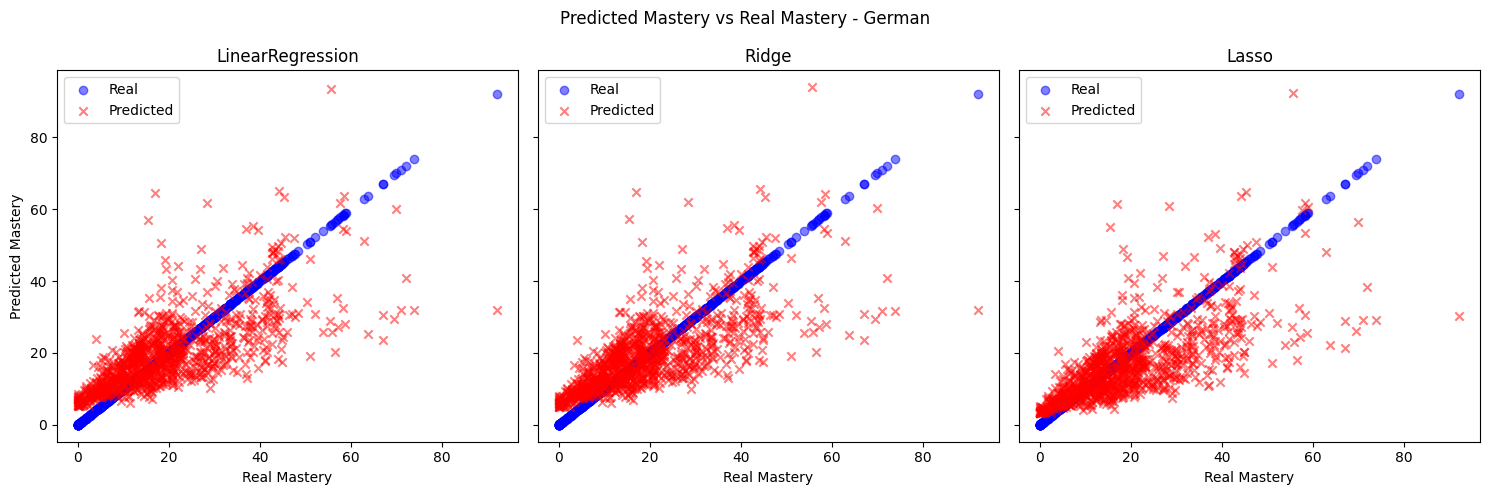

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for idx, (model_name, model) in enumerate(best_models.items()):
    y_pred = model.predict(target_X)

    axs[idx].scatter(target_y, target_y, alpha=0.5, marker='o', color='blue', label='Real')
    axs[idx].scatter(target_y, y_pred, alpha=0.5, marker='x', color='red', label='Predicted')
    axs[idx].set_title(model_name)
    axs[idx].set_xlabel('Real Mastery')
    axs[idx].legend(loc='upper left')

axs[0].set_ylabel('Predicted Mastery')
plt.suptitle('Predicted Mastery vs Real Mastery - German')
plt.tight_layout()
plt.show()

#### Math

In [7]:
math_filenames = [
    'math_gamma_0.1_k_2_window_0.csv',
    'math_gamma_0.1_k_2_window_1.csv',
    'math_gamma_0.1_k_2_window_3.csv',
    'math_gamma_0.1_k_3_window_0.csv',
    'math_gamma_0.1_k_3_window_1.csv',
    'math_gamma_0.1_k_3_window_3.csv',
    'math_gamma_0.1_k_4_window_0.csv',
    'math_gamma_0.1_k_4_window_1.csv',
    'math_gamma_0.1_k_4_window_3.csv',
    'math_gamma_2_k_2_window_0.csv',
    'math_gamma_2_k_2_window_1.csv',
    'math_gamma_2_k_2_window_3.csv',
    'math_gamma_2_k_3_window_0.csv',
    'math_gamma_2_k_3_window_1.csv',
    'math_gamma_2_k_3_window_3.csv',
    'math_gamma_2_k_4_window_0.csv',
    'math_gamma_2_k_4_window_1.csv',
    'math_gamma_2_k_4_window_3.csv',
    'math_gamma_5_k_2_window_0.csv',
    'math_gamma_5_k_2_window_1.csv',
    'math_gamma_5_k_2_window_3.csv',
    'math_gamma_5_k_3_window_0.csv',
    'math_gamma_5_k_3_window_1.csv',
    'math_gamma_5_k_3_window_3.csv',
    'math_gamma_5_k_4_window_0.csv',
    'math_gamma_5_k_4_window_1.csv',
    'math_gamma_5_k_4_window_3.csv',
]


In [8]:
mathematics = open_file(file_name="math_gamma_0.1_k_2_window_1.csv", path="cluster_csv")
mathematics = mathematics.drop("Unnamed: 0", axis=1)
mathematics.head()
data = mathematics.fillna(0)

WEEK_COUNT = 6

# Filter the data to include rows with weeks_since_first_transaction <= Week count - 1
filtered_data = data[data['weeks_since_first_transaction'] <= WEEK_COUNT - 1]

# Filter the data again to get target rows with weeks_since_first_transaction = Week count
target_data = data[data['weeks_since_first_transaction'] == WEEK_COUNT]

# Define features and target variable for the regression
X = filtered_data.drop(columns=['user_id', 'title', 'mastery'])
y = filtered_data['mastery']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models and their hyperparameters
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

alphas = np.logspace(-3, 3, 20)  # Regularization strengths for Ridge and Lasso

# Perform grid search for each model
for model_name, model in models.items():
    if model_name == 'LinearRegression':
        model.fit(X_train, y_train)
        mse = mean_squared_error(y_test, model.predict(X_test))
        print(f"{model_name} - Mean Squared Error: {mse}")
    else:
        param_grid = {'alpha': alphas}
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring=make_scorer(mean_squared_error))
        grid_search.fit(X_train, y_train)
        best_alpha = grid_search.best_params_['alpha']
        best_model = grid_search.best_estimator_
        mse = mean_squared_error(y_test, best_model.predict(X_test))
        print(f"{model_name} (alpha={best_alpha}) - Mean Squared Error: {mse}")

[FOUND] File : math_gamma_0.1_k_2_window_1.csv
	Opening math_gamma_0.1_k_2_window_1.csv dataset
	File loaded with : 5131 lines and 12 columns
LinearRegression - Mean Squared Error: 26.286753880395484
Ridge (alpha=0.001) - Mean Squared Error: 26.28675380277158
Lasso (alpha=1.438449888287663) - Mean Squared Error: 26.52307172605141


##### Test Step

In [9]:
target_X = target_data.drop(columns=['user_id', 'title', 'mastery'])
target_y = target_data['mastery']

# Perform grid search for each model and store the best models
best_models = {}
for model_name, model in models.items():
    if model_name == 'LinearRegression':
        model.fit(X_train, y_train)
        best_models[model_name] = model
    else:
        param_grid = {'alpha': alphas}
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring=make_scorer(mean_squared_error))
        grid_search.fit(X_train, y_train)
        best_alpha = grid_search.best_params_['alpha']
        best_models[model_name] = grid_search.best_estimator_

# Evaluate and print the MSE for each model on the target_data
test_mse_math = []
test_rmse_math = []
test_mae_math = []

for model_name, model in best_models.items():
    y_pred = model.predict(target_X)
    mse = mean_squared_error(target_y, y_pred)
    rmse = mean_squared_error(target_y, y_pred, squared=False)
    mae = mean_absolute_error(target_y, y_pred)

    test_mse_math.append(mse)
    test_rmse_math.append(rmse)
    test_mae_math.append(mae)

    if model_name == 'LinearRegression':
        print(f"{model_name} - Mean Squared Error: {mse}")
        print(f"{model_name} - Root Mean Squared Error: {rmse}")
        print(f"{model_name} - Mean Absolute Error: {mae}")
    else:
        alpha = model.alpha
        print(f"{model_name} (alpha={alpha}) - Mean Squared Error: {mse}")
        print(f"{model_name} (alpha={alpha}) - Root Mean Squared Error: {rmse}")
        print(f"{model_name} (alpha={alpha}) - Mean Absolute Error: {mae}")

LinearRegression - Mean Squared Error: 58.52339292126139
LinearRegression - Root Mean Squared Error: 7.650058360644145
LinearRegression - Mean Absolute Error: 5.327752341828031
Ridge (alpha=0.001) - Mean Squared Error: 58.52339274020388
Ridge (alpha=0.001) - Root Mean Squared Error: 7.650058348810411
Ridge (alpha=0.001) - Mean Absolute Error: 5.327752281252882
Lasso (alpha=1.438449888287663) - Mean Squared Error: 60.8040267087313
Lasso (alpha=1.438449888287663) - Root Mean Squared Error: 7.797693678821405
Lasso (alpha=1.438449888287663) - Mean Absolute Error: 5.180545854355172


##### Explainability

In [10]:
# Feature names
feature_names = target_X.columns.tolist()

# Display coefficients of each model
for model_name, model in best_models.items():
    if hasattr(model, "coef_"):
        print(f"{model_name} coefficients:")
        for feature, coef in zip(feature_names, model.coef_):
            print(f"{feature}: {coef}")
    else:
        print(f"{model_name} does not have coefficients")
    print()

LinearRegression coefficients:
weeks_since_first_transaction: 0.5878355150041276
diligence: 0.003913645343454186
num_questions: -0.04280883993403857
percentage_correct: 0.007289129273559543
num_review: -0.017887226305545862
num_view: 0.04416958668537144
ratio_window_visible: -0.5343478429343129
cluster: 0.007556508992953348

Ridge coefficients:
weeks_since_first_transaction: 0.5878354321850159
diligence: 0.003913645388253568
num_questions: -0.042808839210999636
percentage_correct: 0.007289127914780148
num_review: -0.017887227945371655
num_view: 0.044169580850140513
ratio_window_visible: -0.5343459971346991
cluster: 0.00755649329020438

Lasso coefficients:
weeks_since_first_transaction: 0.012591443424283442
diligence: 0.004119475765715244
num_questions: -0.01892387104593885
percentage_correct: 0.00400101202716081
num_review: -0.00500674831331922
num_view: 0.01650798347074086
ratio_window_visible: -0.0
cluster: 0.0



##### Visualization

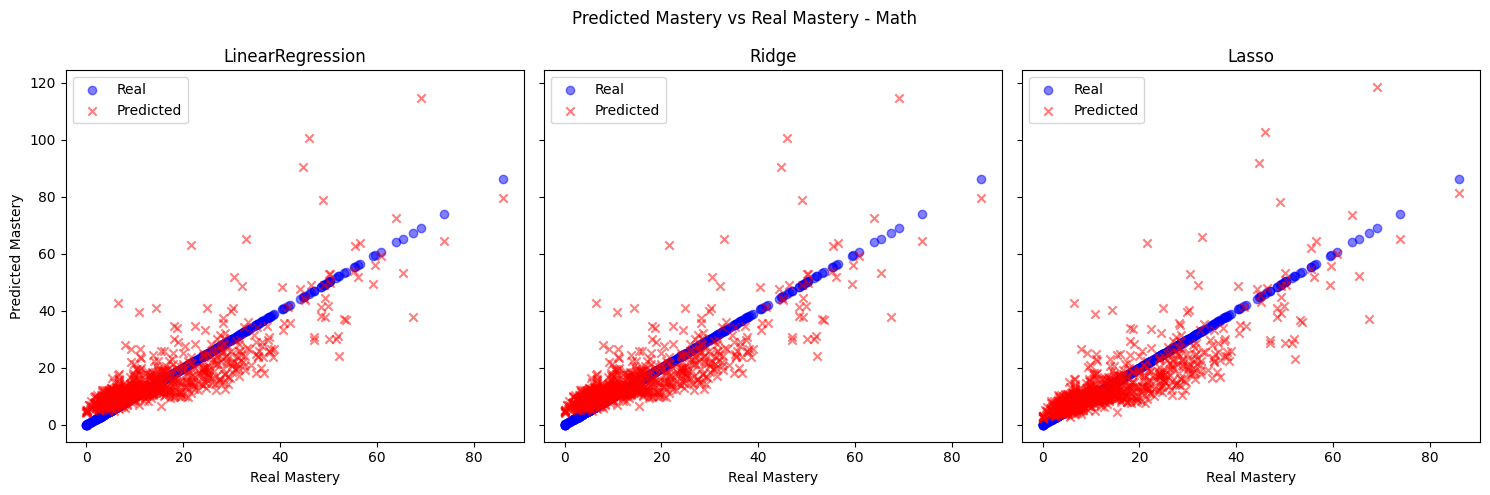

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for idx, (model_name, model) in enumerate(best_models.items()):
    y_pred = model.predict(target_X)

    axs[idx].scatter(target_y, target_y, alpha=0.5, marker='o', color='blue', label='Real')
    axs[idx].scatter(target_y, y_pred, alpha=0.5, marker='x', color='red', label='Predicted')
    axs[idx].set_title(model_name)
    axs[idx].set_xlabel('Real Mastery')
    axs[idx].legend(loc='upper left')

axs[0].set_ylabel('Predicted Mastery')
plt.suptitle('Predicted Mastery vs Real Mastery - Math')
plt.tight_layout()
plt.show()

---

### LSTM and GRU

For LSTM and GRU models we created a **lstm_functions.py** script to define two deep learning models, an LSTM (Long Short-Term Memory) model and a GRU (Gated Recurrent Unit) model, along with a custom dataset class for loading and pre-processing the data. The models are intended to predict the mastery variable for a target week, given the input sequence of data from the preceding weeks.

#### Load Necessary Libraries

In [39]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#### Deutsch

#### LSTM

##### Step 1: Creation of test and train dataframes

In [40]:
# Fill NaN values with 0
deutsch_data.fillna(0, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
deutsch_data[['diligence','num_questions', 'percentage_correct', 'num_review', 'num_view', 'ratio_window_visible', 'cluster']] = scaler.fit_transform(deutsch_data[['diligence', 'num_questions', 'percentage_correct', 'num_review', 'num_view', 'ratio_window_visible', 'cluster']])

In [41]:
user_ids = deutsch_data['user_id'].unique()
valid_user_ids = []

for user_id in user_ids:
    user_data = deutsch_data[deutsch_data['user_id'] == user_id]
    if len(user_data) > 6:
        valid_user_ids.append(user_id)

valid_mastery_df_german = deutsch_data[deutsch_data['user_id'].isin(valid_user_ids)]

train_user_ids, test_user_ids = train_test_split(valid_user_ids, test_size=0.2, random_state=42)
train_df = valid_mastery_df_german[valid_mastery_df_german['user_id'].isin(train_user_ids)]
test_df = valid_mastery_df_german[valid_mastery_df_german['user_id'].isin(test_user_ids)]

print("Train data frame unique user count:", train_df['user_id'].nunique())
print("Test data frame unique user count:", test_df['user_id'].nunique())

Train data frame unique user count: 819
Test data frame unique user count: 205


In [42]:
from lstm_functions import MasteryDataset

train_dataset = MasteryDataset(train_df)
test_dataset = MasteryDataset(test_df)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4)

print(len(train_dataset))
print(len(test_dataset))

819
205


**MasteryDataset** class: This class is a custom PyTorch dataset that takes a pandas dataframe df and a target_week as input. The dataset is designed to provide the input sequences and corresponding target values for the LSTM and GRU models.
- The **_get_filtered_user_ids** method filters out user_ids that have data for the target week.
- The __getitem__ method returns an input sequence and the target value for a given index. It pads the input sequence with zeros if necessary to match the target week's length and creates tensors from the input sequence and target value.

In [43]:
from lstm_functions import LSTMModel
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = train_dataset[0][0].shape[1]
hidden_size = 64
num_layers = 4
output_size = 1
learning_rate = 0.0001

model = LSTMModel(input_size, hidden_size, num_layers, output_size, device).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

num_params = np.sum(np.fromiter((p.numel() for p in model.parameters() if p.requires_grad), dtype=int))
print(f'The model has {num_params:,} trainable parameters')

The model has 123,265 trainable parameters


**LSTMModel** class: This class defines an LSTM model that inherits from PyTorch's nn.Module class. It takes the input size, hidden size, number of layers, output size, and a device as input arguments.
- The LSTM layers are defined using the nn.LSTM module with the given input size, hidden size, and number of layers.
- Two fully connected linear layers (nn.Linear) are added after the LSTM layers.
- The **forward** method takes an input tensor x, initializes the hidden and cell states h0 and c0, and passes the input through the LSTM layers, followed by the linear layers with a ReLU activation function in between.

##### Step 2: Train the model

In [44]:
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for i, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/50], Loss: 27679.1756
Epoch [2/50], Loss: 27278.1834
Epoch [3/50], Loss: 23973.8294
Epoch [4/50], Loss: 20736.2405
Epoch [5/50], Loss: 17146.7180
Epoch [6/50], Loss: 14947.8977
Epoch [7/50], Loss: 13187.9519
Epoch [8/50], Loss: 11926.3374
Epoch [9/50], Loss: 11143.0848
Epoch [10/50], Loss: 10150.3903
Epoch [11/50], Loss: 9699.9956
Epoch [12/50], Loss: 9545.7883
Epoch [13/50], Loss: 9412.1114
Epoch [14/50], Loss: 9175.5317
Epoch [15/50], Loss: 9038.0150
Epoch [16/50], Loss: 7744.5914
Epoch [17/50], Loss: 7066.3355
Epoch [18/50], Loss: 6234.1551
Epoch [19/50], Loss: 5464.2300
Epoch [20/50], Loss: 4742.0560
Epoch [21/50], Loss: 4191.6153
Epoch [22/50], Loss: 3707.1687
Epoch [23/50], Loss: 3294.6535
Epoch [24/50], Loss: 3000.0152
Epoch [25/50], Loss: 2677.4723
Epoch [26/50], Loss: 2468.9995
Epoch [27/50], Loss: 2281.8350
Epoch [28/50], Loss: 2125.0151
Epoch [29/50], Loss: 1999.8609
Epoch [30/50], Loss: 1947.9301
Epoch [31/50], Loss: 1792.9300
Epoch [32/50], Loss: 1705.6200
Epoch [

##### Step 3: Test the model

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

model.eval()
predictions_german_lstm = []
test_loss = 0
num_test_samples = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predictions_german_lstm.extend(outputs.cpu().numpy().tolist())

real_values_german = test_df[test_df["weeks_since_first_transaction"] == 6]
# Calculate the Mean Squared Error
mse = mean_squared_error(real_values_german["mastery"], predictions_german_lstm)
rmse = mean_squared_error(real_values_german["mastery"], predictions_german_lstm, squared =False)
mae = mean_absolute_error(real_values_german["mastery"], predictions_german_lstm)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 30.135480513127888
Root Mean Squared Error: 5.489579265583829
Mean Absolute Error: 3.540371014051344


After obtaining the predictions, the ground truth values for the test dataset are extracted from the test_df dataframe for rows where the weeks_since_first_transaction value is 6.

#### GRU

##### Step 1: Build the model

In [46]:
from lstm_functions import GRUModel
model = GRUModel(input_size, hidden_size, num_layers, output_size, device).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

num_params = np.sum(np.fromiter((p.numel() for p in model.parameters() if p.requires_grad), dtype=int))
print(f'The model has {num_params:,} trainable parameters')

The model has 93,505 trainable parameters


**GRUModel** class: This class defines a GRU model, similar to the **LSTMModel** class, but it uses the nn.GRU module instead of the nn.LSTM module. The GRU model also inherits from PyTorch's nn.Module class and takes the same input arguments as the LSTM model.
- The GRU layers are defined using the nn.GRU module with the given input size, hidden size, and number of layers.
- Two fully connected linear layers (nn.Linear) are added after the GRU layers.
- The forward method takes an input tensor x, initializes the hidden state h0, and passes the input through the GRU layers, followed by the linear layers with a ReLU activation function in between.

##### Step 2: Train the model

In [47]:
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for i, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/50], Loss: 28104.5840
Epoch [2/50], Loss: 26032.1908
Epoch [3/50], Loss: 22459.4257
Epoch [4/50], Loss: 19715.4616
Epoch [5/50], Loss: 17470.0972
Epoch [6/50], Loss: 15516.2644
Epoch [7/50], Loss: 13995.8971
Epoch [8/50], Loss: 13147.4810
Epoch [9/50], Loss: 11308.1047
Epoch [10/50], Loss: 10541.4181
Epoch [11/50], Loss: 10460.1566
Epoch [12/50], Loss: 9584.9283
Epoch [13/50], Loss: 9380.8184
Epoch [14/50], Loss: 9061.3250
Epoch [15/50], Loss: 7700.8302
Epoch [16/50], Loss: 6771.2593
Epoch [17/50], Loss: 5745.8369
Epoch [18/50], Loss: 4957.7685
Epoch [19/50], Loss: 4468.8255
Epoch [20/50], Loss: 3990.2651
Epoch [21/50], Loss: 3623.4925
Epoch [22/50], Loss: 3201.2105
Epoch [23/50], Loss: 2931.7142
Epoch [24/50], Loss: 2682.1387
Epoch [25/50], Loss: 2446.8004
Epoch [26/50], Loss: 2285.3000
Epoch [27/50], Loss: 2139.5537
Epoch [28/50], Loss: 2007.7157
Epoch [29/50], Loss: 1889.1963
Epoch [30/50], Loss: 1837.2217
Epoch [31/50], Loss: 1719.4520
Epoch [32/50], Loss: 1669.0531
Epoch 

##### Step 3: Test the model

In [48]:
model.eval()
predictions_german_gru = []
test_loss = 0
num_test_samples = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predictions_german_gru.extend(outputs.cpu().numpy().tolist())

# Calculate the Mean Squared Error
mse = mean_squared_error(real_values_german["mastery"], predictions_german_gru)
rmse = mean_squared_error(real_values_german["mastery"], predictions_german_gru, squared =False)
mae = mean_absolute_error(real_values_german["mastery"], predictions_german_gru)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 31.469070329779157
Root Mean Squared Error: 5.609729969417348
Mean Absolute Error: 3.538579574236215


##### If all predictions are 0

In [49]:
predictions = [0] * len(test_dataset)

# Calculate the Mean Squared Error
mse = mean_squared_error(real_values_german["mastery"], predictions)
rmse = mean_squared_error(real_values_german["mastery"], predictions, squared =False)
mae = mean_absolute_error(real_values_german["mastery"], predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 574.1860485739309
Root Mean Squared Error: 23.962179545565775
Mean Absolute Error: 19.969150250905418


### Math

#### LSTM

#### Step 1: Build the model

In [50]:
# Fill NaN values with 0
mathematics.fillna(0, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
mathematics[['diligence', 'num_questions', 'percentage_correct', 'num_review', 'num_view', 'ratio_window_visible', 'cluster']] = scaler.fit_transform(mathematics[['diligence', 'num_questions', 'percentage_correct', 'num_review', 'num_view', 'ratio_window_visible', 'cluster']])

In [51]:
user_ids = mathematics['user_id'].unique()
valid_user_ids = []

for user_id in user_ids:
    user_data = mathematics[mathematics['user_id'] == user_id]
    if len(user_data) > 6:
        valid_user_ids.append(user_id)

valid_mastery_df_math = mathematics[mathematics['user_id'].isin(valid_user_ids)]

train_user_ids, test_user_ids = train_test_split(valid_user_ids, test_size=0.2, random_state=42)
train_df = valid_mastery_df_math[valid_mastery_df_math['user_id'].isin(train_user_ids)]
test_df = valid_mastery_df_math[valid_mastery_df_math['user_id'].isin(test_user_ids)]

print("Train data frame unique user count:", train_df['user_id'].nunique())
print("Test data frame unique user count:", test_df['user_id'].nunique())

Train data frame unique user count: 586
Test data frame unique user count: 147


In [52]:
from lstm_functions import MasteryDataset

train_dataset = MasteryDataset(train_df)
test_dataset = MasteryDataset(test_df)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4)

print(len(train_dataset))
print(len(test_dataset))

586
147


In [53]:
from lstm_functions import LSTMModel
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = train_dataset[0][0].shape[1]
hidden_size = 64
num_layers = 4
output_size = 1
learning_rate = 0.0001

model = LSTMModel(input_size, hidden_size, num_layers, output_size, device).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

num_params = np.sum(np.fromiter((p.numel() for p in model.parameters() if p.requires_grad), dtype=int))
print(f'The model has {num_params:,} trainable parameters')

The model has 123,265 trainable parameters


#### Step 2: Train the model

In [54]:
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for i, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/50], Loss: 15960.8686
Epoch [2/50], Loss: 15927.3529
Epoch [3/50], Loss: 15291.6452
Epoch [4/50], Loss: 13361.5952
Epoch [5/50], Loss: 11233.1862
Epoch [6/50], Loss: 9897.8418
Epoch [7/50], Loss: 8832.5337
Epoch [8/50], Loss: 7995.0240
Epoch [9/50], Loss: 7424.3075
Epoch [10/50], Loss: 6991.7091
Epoch [11/50], Loss: 6732.5504
Epoch [12/50], Loss: 6494.9191
Epoch [13/50], Loss: 6337.2579
Epoch [14/50], Loss: 6027.6406
Epoch [15/50], Loss: 5495.6146
Epoch [16/50], Loss: 4908.7832
Epoch [17/50], Loss: 4509.2845
Epoch [18/50], Loss: 4081.5007
Epoch [19/50], Loss: 3761.6505
Epoch [20/50], Loss: 3456.0122
Epoch [21/50], Loss: 3150.5943
Epoch [22/50], Loss: 2917.1140
Epoch [23/50], Loss: 2687.4987
Epoch [24/50], Loss: 2503.4529
Epoch [25/50], Loss: 2351.3675
Epoch [26/50], Loss: 2194.3817
Epoch [27/50], Loss: 2051.3457
Epoch [28/50], Loss: 1945.1484
Epoch [29/50], Loss: 1862.9554
Epoch [30/50], Loss: 1778.7232
Epoch [31/50], Loss: 1658.4213
Epoch [32/50], Loss: 1606.8219
Epoch [33/50

#### Step 3: Test the model

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

model.eval()
predictions_math_lstm = []
test_loss = 0
num_test_samples = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predictions_math_lstm.extend(outputs.cpu().numpy().tolist())

real_values_math = test_df[test_df["weeks_since_first_transaction"] == 6]
# Calculate the Mean Squared Error
mse = mean_squared_error(real_values_math["mastery"], predictions_math_lstm)
rmse = mean_squared_error(real_values_math["mastery"], predictions_math_lstm, squared =False)
mae = mean_absolute_error(real_values_math["mastery"], predictions_math_lstm)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 11.403256254897368
Root Mean Squared Error: 3.3768707785311194
Mean Absolute Error: 2.426213938729688


#### GRU

##### Step 1: Build the model

In [56]:
from lstm_functions import GRUModel
model = GRUModel(input_size, hidden_size, num_layers, output_size, device).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

num_params = np.sum(np.fromiter((p.numel() for p in model.parameters() if p.requires_grad), dtype=int))
print(f'The model has {num_params:,} trainable parameters')

The model has 93,505 trainable parameters


##### Step 2: Train the model

In [57]:
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for i, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/50], Loss: 16029.2051
Epoch [2/50], Loss: 15399.8584
Epoch [3/50], Loss: 14269.9854
Epoch [4/50], Loss: 12912.8086
Epoch [5/50], Loss: 11857.0354
Epoch [6/50], Loss: 11015.0467
Epoch [7/50], Loss: 10004.8506
Epoch [8/50], Loss: 9390.3131
Epoch [9/50], Loss: 8736.7250
Epoch [10/50], Loss: 8150.9591
Epoch [11/50], Loss: 7690.5627
Epoch [12/50], Loss: 7288.7498
Epoch [13/50], Loss: 6974.3126
Epoch [14/50], Loss: 6858.5727
Epoch [15/50], Loss: 6780.3307
Epoch [16/50], Loss: 6471.9533
Epoch [17/50], Loss: 6381.5364
Epoch [18/50], Loss: 6331.4570
Epoch [19/50], Loss: 6453.9683
Epoch [20/50], Loss: 5604.3147
Epoch [21/50], Loss: 5078.5375
Epoch [22/50], Loss: 4552.0153
Epoch [23/50], Loss: 4172.1479
Epoch [24/50], Loss: 3855.2937
Epoch [25/50], Loss: 3524.2178
Epoch [26/50], Loss: 3293.7125
Epoch [27/50], Loss: 2967.1240
Epoch [28/50], Loss: 2754.5767
Epoch [29/50], Loss: 2570.7204
Epoch [30/50], Loss: 2397.3664
Epoch [31/50], Loss: 2270.7162
Epoch [32/50], Loss: 2151.0824
Epoch [33/

##### Step 3: Test the model

In [58]:
model.eval()
predictions_math_gru = []
test_loss = 0
num_test_samples = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predictions_math_gru.extend(outputs.cpu().numpy().tolist())

# Calculate the Mean Squared Error
mse = mean_squared_error(real_values_math["mastery"], predictions_math_gru)
rmse = mean_squared_error(real_values_math["mastery"], predictions_math_gru, squared =False)
mae = mean_absolute_error(real_values_math["mastery"], predictions_math_gru)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 14.116872632645707
Root Mean Squared Error: 3.75724269014469
Mean Absolute Error: 2.321272368966563


##### If all predictions are 0

In [59]:
predictions = [0] * len(test_dataset)

# Calculate the Mean Squared Error
mse = mean_squared_error(real_values_math["mastery"], predictions)
rmse = mean_squared_error(real_values_math["mastery"], predictions, squared =False)
mae = mean_absolute_error(real_values_math["mastery"], predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 393.9993772646853
Root Mean Squared Error: 19.84941755479705
Mean Absolute Error: 15.648943071439573


The results presented above are based on a model that predicts all zeros for the test dataset, essentially serving as a naive baseline. The performance of this baseline model is evaluated using three metrics: 
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE). 

With an MSE of 393.999, an RMSE of 19.849, and an MAE of 15.648, the baseline model demonstrates a significant error when predicting the 'mastery' variable.

*Your discussion about your model training goes here*

**DISCUSSION**: In the regression section, we initially focused on data preprocessing and filtering. The data was filtered based on the 'weeks_since_first_transaction' column to create two separate dataframes: one with rows where the weeks are less than or equal to WEEK_COUNT - 1 (filtered_data) and another with rows where the weeks equal WEEK_COUNT (target_data). Next, we defined the features and target variable for the regression task, excluding 'user_id', 'title', and 'mastery' columns from the feature set. The data was then split into training and testing sets using a 70/30 split.

In the LSTM and GRU section, we first created a custom PyTorch dataset class, MasteryDataset, to handle the data preparation and processing for our time series data. This class is responsible for filtering valid user_ids, handling variable-length sequences by padding with zeros, and returning the input sequence (first six weeks) and target value (mastery at week 6) for each user.

Next, we defined two PyTorch model classes: LSTMModel and GRUModel. Both classes contain an RNN layer (LSTM or GRU, respectively), followed by two linear layers with a ReLU activation function after the first linear layer. These models are designed to accept input sequences and output a single value representing the predicted mastery at week 6.

After defining the models, we trained the LSTM model using the Mean Squared Error (MSE) loss as the objective function and the Adam optimizer. The model was evaluated on the test set using a DataLoader, which allowed us to process test data in batches. The evaluation metrics used for the LSTM model include Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).

A similar process was carried out for the GRU model, using the same training parameters, evaluation metrics, and test set. 



---

## Model Evaluation
In this task, you will use metrics to evaluate your model.

**METRICS**

Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) are popular evaluation metrics for regression tasks because they provide valuable insights into the performance of a model in predicting continuous outcomes. Each of these metrics has its unique advantages and contributes to the overall understanding of model performance.

- **Mean Squared Error (MSE)**: MSE measures the average squared difference between the predicted values and the actual values. By squaring the errors, MSE puts more emphasis on larger errors and penalizes them heavily. 
- **Mean Absolute Error (MAE)**: MAE calculates the average absolute difference between the predicted values and the actual values. This metric provides a more interpretable measure of the average error magnitude, as it is on the same scale as the target variable.
- **Root Mean Squared Error (RMSE)**: This metric combines the sensitivity to large errors (as in MSE) with the interpretability of the error scale (as in MAE). RMSE represents the standard deviation of the residuals (prediction errors) and provides an easily understandable measure of the average error magnitude.

### Regression Models

#### Math

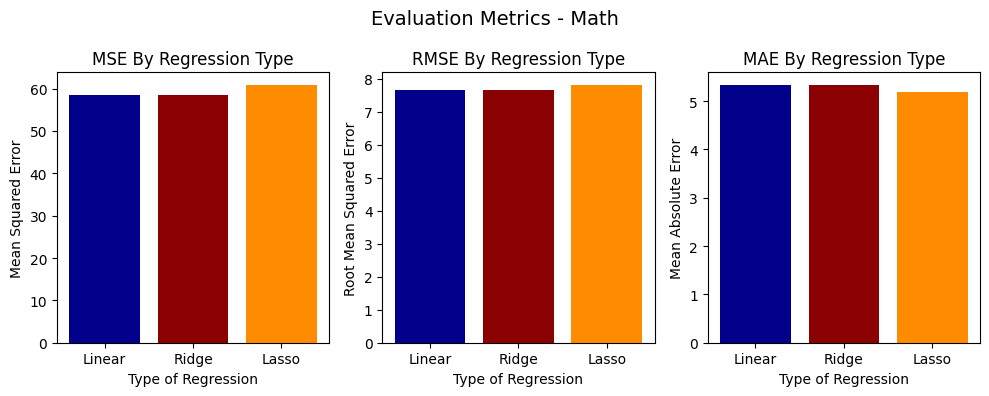

In [60]:
#Plot and compare the test performances of regressions
reg_labels = ['Linear', 'Ridge', 'Lasso']

#Mean Squared Error
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs[0].bar(reg_labels, test_mse_math, color=['darkblue', 'darkred', 'darkorange'])
axs[0].set_title('MSE By Regression Type')
axs[0].set_xlabel('Type of Regression')
axs[0].set_ylabel('Mean Squared Error')

#Root Mean Squared Error
axs[1].bar(reg_labels, test_rmse_math, color=['darkblue', 'darkred', 'darkorange'])
axs[1].set_title('RMSE By Regression Type')
axs[1].set_xlabel('Type of Regression')
axs[1].set_ylabel('Root Mean Squared Error')

#Mean Absolute Error
axs[2].bar(reg_labels, test_mae_math, color=['darkblue', 'darkred', 'darkorange'])
axs[2].set_title('MAE By Regression Type')
axs[2].set_xlabel('Type of Regression')
axs[2].set_ylabel('Mean Absolute Error')

plt.suptitle("Evaluation Metrics - Math", fontsize = 14)
plt.tight_layout()

#### German

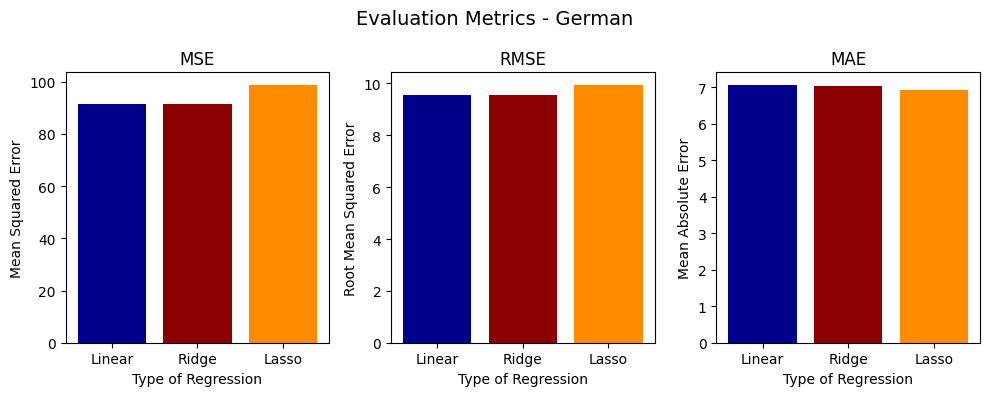

In [61]:
#Plot and compare the test performances of regressions
reg_labels = ['Linear', 'Ridge', 'Lasso']

#Mean Squared Error
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs[0].bar(reg_labels, test_mse_german, color=['darkblue', 'darkred', 'darkorange'])
axs[0].set_title('MSE')
axs[0].set_xlabel('Type of Regression')
axs[0].set_ylabel('Mean Squared Error')

#Root Mean Squared Error
axs[1].bar(reg_labels, test_rmse_german, color=['darkblue', 'darkred', 'darkorange'])
axs[1].set_title('RMSE')
axs[1].set_xlabel('Type of Regression')
axs[1].set_ylabel('Root Mean Squared Error')

#Mean Absolute Error
axs[2].bar(reg_labels, test_mae_german, color=['darkblue', 'darkred', 'darkorange'])
axs[2].set_title('MAE')
axs[2].set_xlabel('Type of Regression')
axs[2].set_ylabel('Mean Absolute Error')

plt.suptitle("Evaluation Metrics - German", fontsize = 14)
plt.tight_layout()

Following the data preparation, we experimented with three regression models: Linear Regression, Ridge Regression, and Lasso Regression. For Ridge and Lasso Regression, we performed a grid search to identify the optimal alpha (regularization strength) values for each model. The performance of each model was evaluated based on the Mean Squared Error (MSE) on the testing set. 

**Ridge Regression** with an alpha of 1000 demonstrated a slightly better performance compared to Linear Regression, while Lasso Regression with an alpha of 233.572 yielded the worst performance for Math dataset. 

In the German dataset, **Linear Regression** demonstrated a slightly better performance compared to Ridge Regression while Lasso Regression with an alpha of 233.572 yielded the worst performance

### LSTM

#### Math

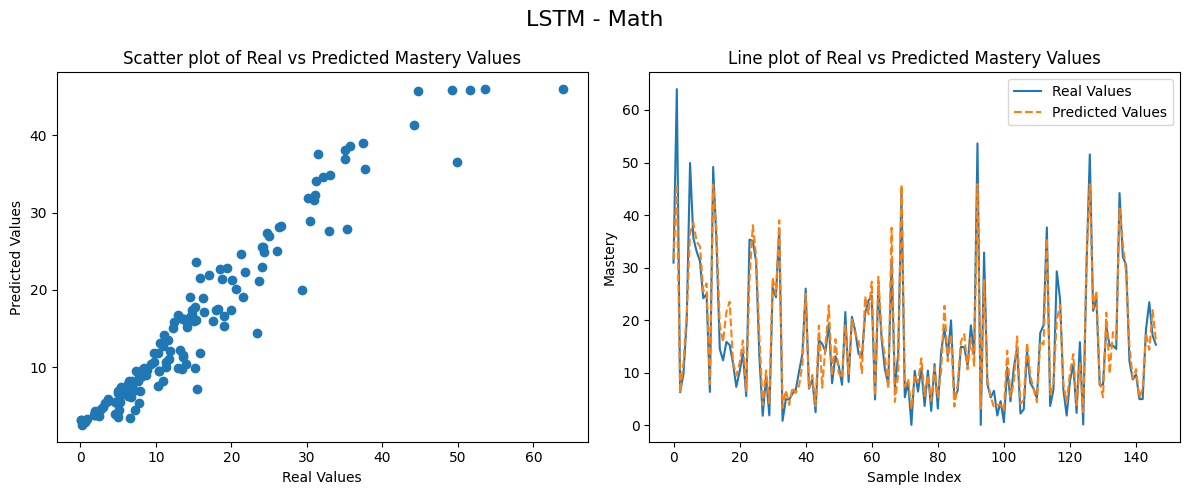

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Create a scatter plot
ax1.scatter(real_values_math["mastery"], predictions_math_lstm)
ax1.set_xlabel("Real Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("Scatter plot of Real vs Predicted Mastery Values")

# Create a line plot
ax2.plot(real_values_math["mastery"].values, label="Real Values")
ax2.plot(predictions_math_lstm, label="Predicted Values", linestyle="--")
ax2.set_xlabel("Sample Index")
ax2.set_ylabel("Mastery")
ax2.set_title("Line plot of Real vs Predicted Mastery Values")
ax2.legend()

plt.suptitle("LSTM - Math", fontsize = 16)
plt.tight_layout()
plt.show()

#### German

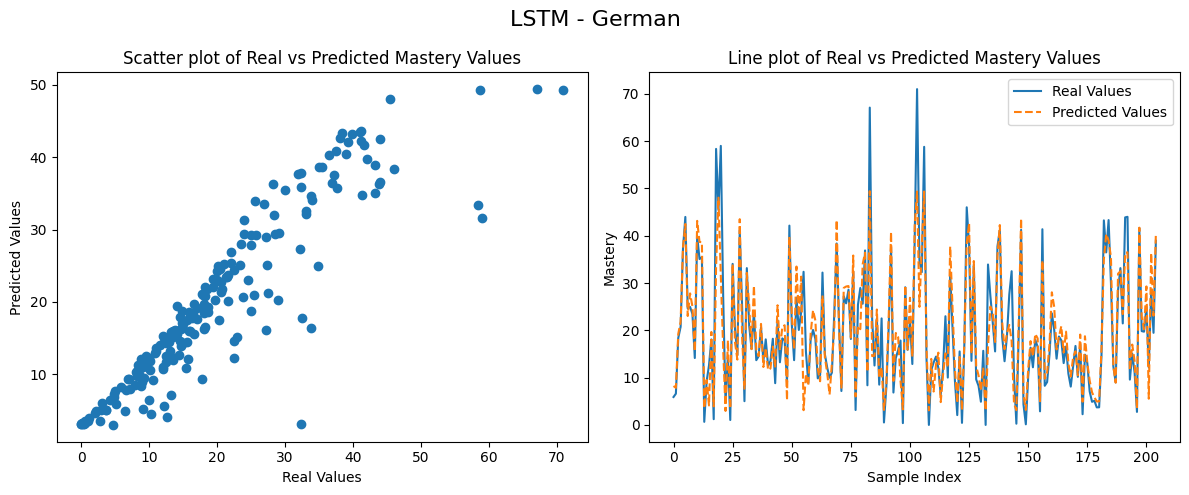

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Create a scatter plot
ax1.scatter(real_values_german["mastery"], predictions_german_lstm)
ax1.set_xlabel("Real Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("Scatter plot of Real vs Predicted Mastery Values")

# Create a line plot
ax2.plot(real_values_german["mastery"].values, label="Real Values")
ax2.plot(predictions_german_lstm, label="Predicted Values", linestyle="--")
ax2.set_xlabel("Sample Index")
ax2.set_ylabel("Mastery")
ax2.set_title("Line plot of Real vs Predicted Mastery Values")
ax2.legend()

plt.suptitle("LSTM - German", fontsize = 16)
plt.tight_layout()
plt.show()

### GRU

#### Math

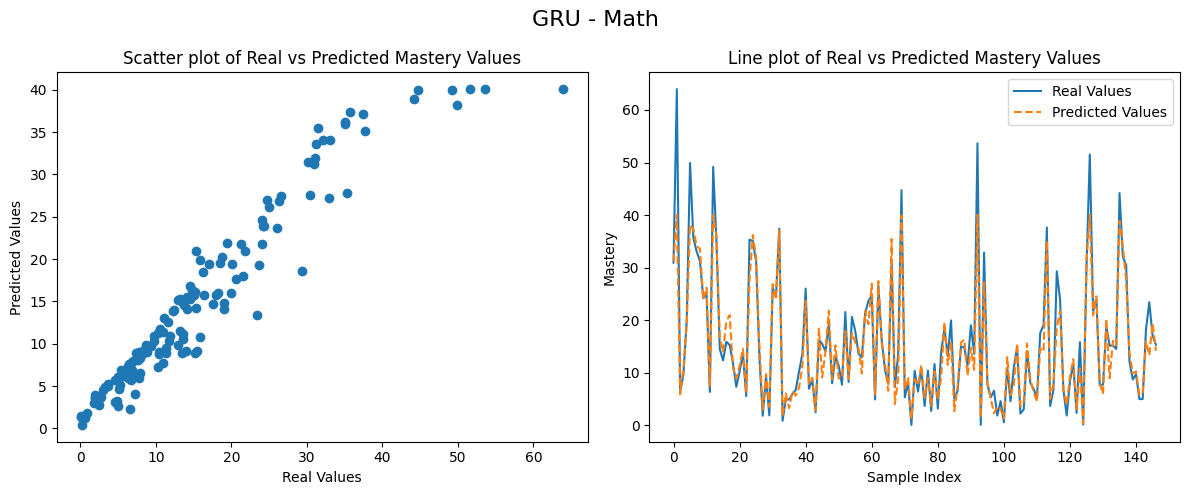

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Create a scatter plot
ax1.scatter(real_values_math["mastery"], predictions_math_gru)
ax1.set_xlabel("Real Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("Scatter plot of Real vs Predicted Mastery Values")

# Create a line plot
ax2.plot(real_values_math["mastery"].values, label="Real Values")
ax2.plot(predictions_math_gru, label="Predicted Values", linestyle="--")
ax2.set_xlabel("Sample Index")
ax2.set_ylabel("Mastery")
ax2.set_title("Line plot of Real vs Predicted Mastery Values")
ax2.legend()

plt.suptitle("GRU - Math", fontsize = 16)
plt.tight_layout()
plt.show()

#### German

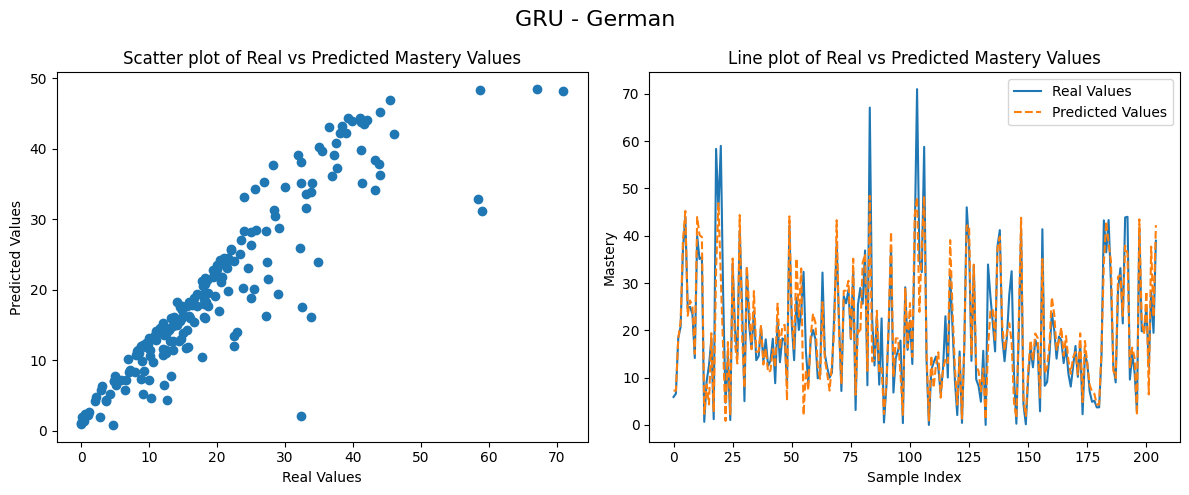

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Create a scatter plot
ax1.scatter(real_values_german["mastery"], predictions_german_gru)
ax1.set_xlabel("Real Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("Scatter plot of Real vs Predicted Mastery Values")

# Create a line plot
ax2.plot(real_values_german["mastery"].values, label="Real Values")
ax2.plot(predictions_german_gru, label="Predicted Values", linestyle="--")
ax2.set_xlabel("Sample Index")
ax2.set_ylabel("Mastery")
ax2.set_title("Line plot of Real vs Predicted Mastery Values")
ax2.legend()

plt.suptitle("GRU - German", fontsize = 16)
plt.tight_layout()
plt.show()

---